# Milestone 2

In [2]:
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
import os

import numpy as np 
import pandas as pd
pd.options.display.max_columns = None


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['figure.dpi'] = 100 

import seaborn as sns
sns.set_theme(style="whitegrid")

import matplotlib.image as mpimg
import ipywidgets as widgets
from IPython.display import display


## 1. Experiment Tracking (10%)

Please do this to install comet_ml pip <br>
> conda activate ift6758-conda-env <br>
> conda install pip<br>
> which pip<br>
> pip install comet_ml<br>



In [4]:
import comet_ml
comet_ml.init()

COMET INFO: Comet API key is valid


## 2. Feature Engineering - I (10%)

* Acquire all of the raw play-by-play data for the 2015/16 season all the way to the 2019/20 season (inclusive).
* Set aside all of the 2019/20 data as your final test set. 
* You will use the 2015/16 - 2018/19 regular season data to create your training and validation sets. 
* Until Part 7, any reference to the “dataset” will exclusively refer to the 2015/16 - 2018/19 data


In [5]:
from ift6758.data.functions import loadstats
from ift6758.data.tidyData_adv import tidyData_adv

In [4]:

dfs_2015 = loadstats(2015,'./data/', playoffs=False)
df_2015 = tidyData_adv(dfs_2015)

dfs_2016 = loadstats(2016,'./data/',playoffs=False)
df_2016 = tidyData_adv(dfs_2016)

dfs_2017 = loadstats(2017,'./data/',playoffs=False)
df_2017 = tidyData_adv(dfs_2017)

dfs_2018 = loadstats(2018,'./data/',playoffs=False)
df_2018 = tidyData_adv(dfs_2018)

# dfs_2019_po = loadstats(2019,'./data/', playoffs=True,regular=False)
# df_test_po = tidyData_adv(dfs_2019_po)
# dfs_2019_rg = loadstats(2019,'./data/', playoffs=False,regular=True)
# df_test_rg = tidyData_adv(dfs_2019_rg) <---- do this on section# 7

Error code: 404 at gameID:2015021231. Game not found.
size of data in regular season: 1230
Error code: 404 at gameID:2016021231. Game not found.
size of data in regular season: 1230
size of data in regular season: 1271
size of data in regular season: 1271


In [5]:
df_2015.shape

(73792, 29)

In [5]:
df = df_2015.append(df_2016, ignore_index=True).append(df_2017, ignore_index=True).append(df_2018, ignore_index=True)

https://kapernikov.com/ipywidgets-with-matplotlib/

In [6]:
dfs_tidy = df
gameIds = np.unique(dfs_tidy.game_id )

@widgets.interact(gameid=gameIds)
def showTeams( gameid="2015020001" ):
    teams = np.unique(dfs_tidy[dfs_tidy.game_id == gameid].teamInfo)
    periods = np.unique(dfs_tidy[dfs_tidy.game_id == gameid].period)
    #print(teams)
    @widgets.interact(team=teams, period=periods, showGoalsOnly=False)
    def teams(team="Montréal Canadiens", period=1, showGoalsOnly=False):
        #print(gameid, " ", team )
        img = mpimg.imread('figures/nhl_rink.png')
        fig, ax = plt.subplots(figsize=(20, 8.5))
        #fig = plt.figure( figsize=(20, 8.5))
        ax.imshow(img, extent=[-100, 100, -42.5, 42.5])
        [l.remove() for l in ax.lines]
        if showGoalsOnly:
            plotDF = dfs_tidy[ (dfs_tidy.game_id == gameid) & (dfs_tidy.period == period) & (dfs_tidy.teamInfo == team) & (dfs_tidy.isGoal)]
        else:
            plotDF = dfs_tidy[ (dfs_tidy.game_id == gameid) & (dfs_tidy.period == period) & (dfs_tidy.teamInfo == team)]
        ax.plot( plotDF['coordinates_x'], plotDF['coordinates_y'], 'bo')
        home_team = np.unique(dfs_tidy[ (dfs_tidy.game_id == gameid) & (dfs_tidy.period == period) & (dfs_tidy.teamInfo == team)].homeTeam)[0]
        away_team = np.unique(dfs_tidy[ (dfs_tidy.game_id == gameid) & (dfs_tidy.period == period) & (dfs_tidy.teamInfo == team)].awayTeam)[0]
        home_side = np.unique(dfs_tidy[ (dfs_tidy.game_id == gameid) & (dfs_tidy.period == period) & (dfs_tidy.teamInfo == team)].homeSide)[0]
        @widgets.interact(homeTeam=home_team, awayTeam=away_team, homeSide=home_side)
        def teamInfo(homeTeam=home_team, awayTeam=away_team, homeSide=home_side):
            return homeTeam, awayTeam, homeSide
        
        

interactive(children=(Dropdown(description='gameid', options=('2015020001', '2015020002', '2015020003', '20150…

In [7]:
df.iloc[1]

game_id                        2015020001
event_idx                               9
speed                            7.211103
periodSeconds_last                    7.0
eventType_last                   GIVEAWAY
rebound                             False
period                                  1
periodType                        REGULAR
periodTime                          01:05
periodSeconds                        65.0
teamInfo              Toronto Maple Leafs
isGoal                              False
shotType                        Snap Shot
coordinates_x                       -79.0
coordinates_y                         0.0
coordinates_x_last                  -37.0
coordinates_y_last                  -28.0
distance_last                   50.477718
dist_goal                            11.0
angle_goal                           -0.0
angle_change                          0.0
angle_speed                          <NA>
shooter                       Nazem Kadri
goalie                        Care

#### Using your training dataset create a tidied dataset for each SHOT event, with the following columns (you can name them however you want):
* Distance from net
* Angle from net
* Is goal (0 or 1)
* Empty Net (0 or 1; you can assume NaNs are 0)


You can approximate the net as a single point (i.e. you don’t need to account for the width of the net when computing the distance or angle). 

You should be able to create this easily using the functionality you implemented for tidying data in Milestone 1, as you will only need the (x, y) coordinates for each shot event. 


Create and include the following figures in your blogpost and briefly discuss your observations (few sentences):

* A histogram of shot counts (goals and no-goals separated), binned by distance
* A histogram of shot counts (goals and no-goals separated), binned by angle
* A 2D histogram where one axis is the distance and the other is the angle. You do not need to separate goals and no-goals.
 Hint: check out jointplots. 
*As always, make sure all of your axes are labeled correctly, and you make the appropriate choice of axis scale.


### A histogram of shot counts (goals and no-goals separated), binned by distance

In [8]:
data = df[["dist_goal", "isGoal"]].dropna()

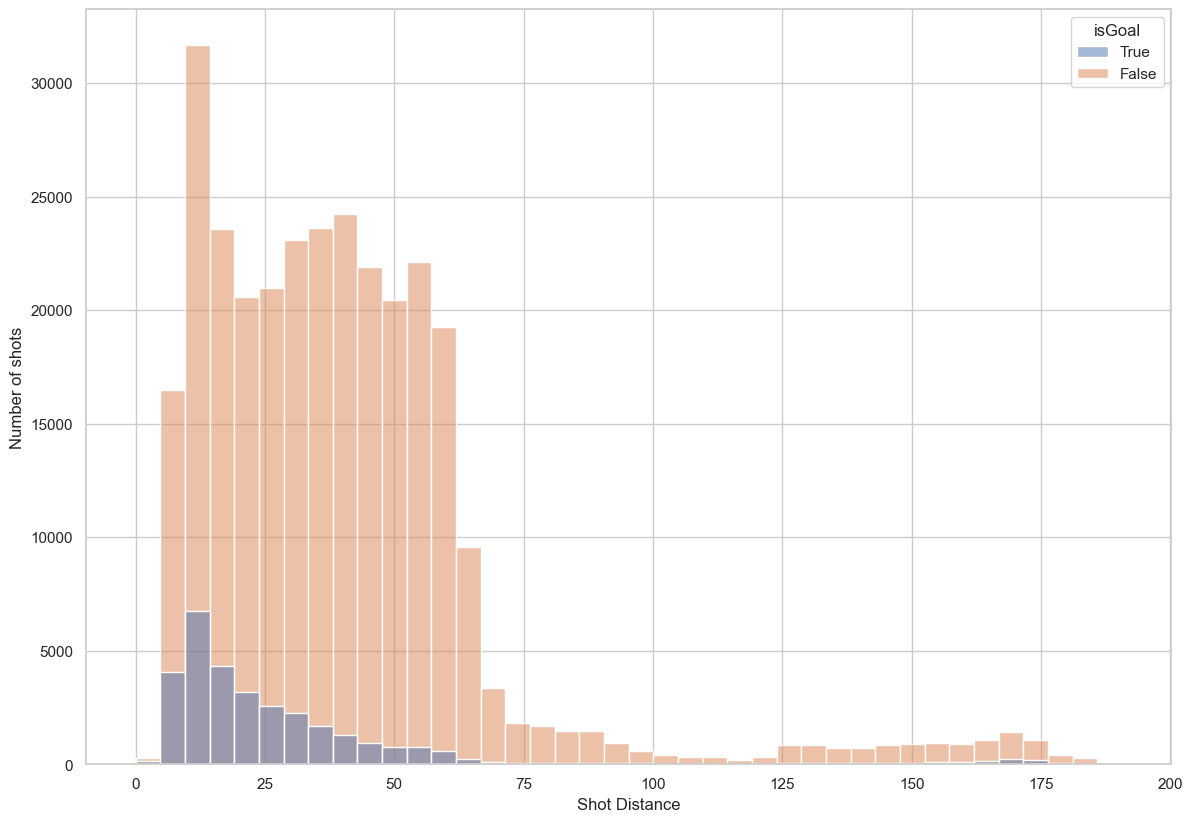

In [9]:
ax = sns.histplot( data, x = "dist_goal", hue="isGoal", hue_order = [True, False], legend=True, bins=40)
ax.set(xlabel='Shot Distance', ylabel='Number of shots')
ax.get_figure().savefig("m2_q2_1_dist_to_goal.png")

In [10]:
df.columns

Index(['game_id', 'event_idx', 'speed', 'periodSeconds_last', 'eventType_last',
       'rebound', 'period', 'periodType', 'periodTime', 'periodSeconds',
       'teamInfo', 'isGoal', 'shotType', 'coordinates_x', 'coordinates_y',
       'coordinates_x_last', 'coordinates_y_last', 'distance_last',
       'dist_goal', 'angle_goal', 'angle_change', 'angle_speed', 'shooter',
       'goalie', 'emptyNet', 'strength', 'homeTeam', 'awayTeam', 'homeSide'],
      dtype='object')

### A histogram of shot counts (goals and no-goals separated), binned by angle

In [11]:
data2 = data = df[["angle_goal", "isGoal"]].dropna()

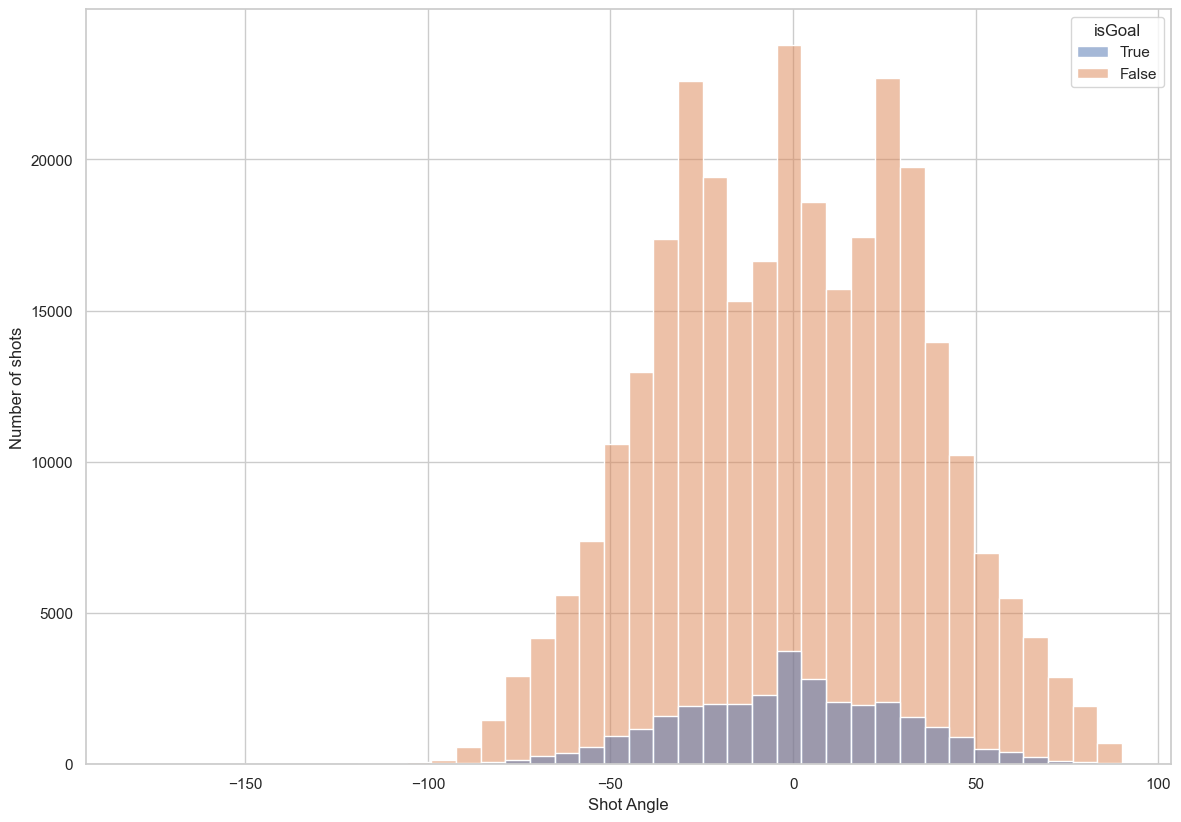

In [12]:
ax = sns.histplot( data2, x = "angle_goal", hue="isGoal", hue_order = [True, False], bins=40)
ax.set(xlabel='Shot Angle', ylabel='Number of shots')
ax.get_figure().savefig("m2_q2_1_angle_to_goal.png")

### A 2D histogram where one axis is the distance and the other is the angle. You do not need to separate goals and no-goals.

In [13]:
data3 = df[["dist_goal", "angle_goal", "isGoal"]]#.dropna()

In [14]:
data3.head()

,dist_goal,angle_goal,isGoal
0,35.510562,-9.727579,False
1,11.0,-0.0,False
2,15.033296,3.814075,False
3,50.209561,45.806929,False
4,29.017236,1.974934,False


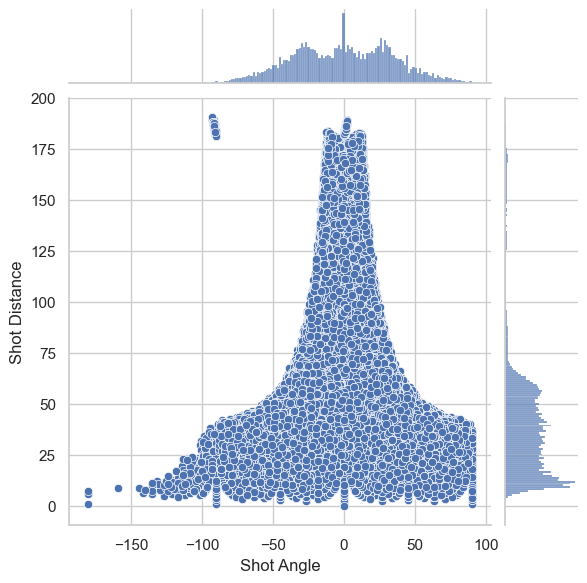

In [15]:
#import seaborn as sns
#ax = sns.histplot( data2, x = "angle_goal", hue="isGoal", bins=40)
ax = sns.jointplot( data = data3, x = "angle_goal", y = "dist_goal", dropna=True)
ax.set_axis_labels( xlabel='Shot Angle', ylabel='Shot Distance')
ax.savefig("m2_q2_1_joint_ang_to_dist.png")

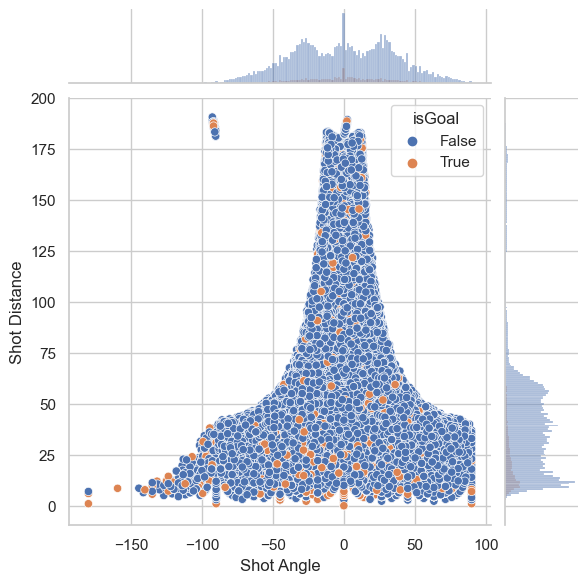

In [16]:
#BACK UP 
ax = sns.JointGrid(data = data3, x = "angle_goal", y = "dist_goal", dropna=True, hue="isGoal")
ax.plot(sns.scatterplot, sns.histplot)
ax.set_axis_labels( xlabel='Shot Angle', ylabel='Shot Distance')
#ax.savefig("m2_q2_1_joint_ang_to_dist.png")

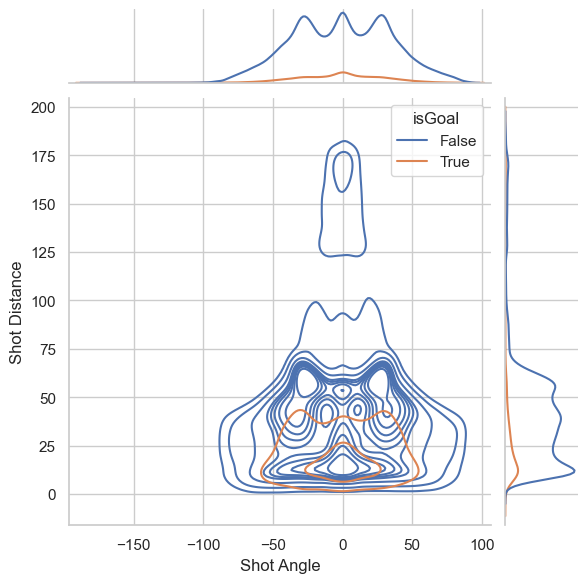

In [17]:
#BACK UP
#ax = sns.histplot( data2, x = "angle_goal", hue="isGoal", bins=40)
ax = sns.jointplot( data = data3, x = "angle_goal", y = "dist_goal", dropna=True, hue="isGoal", kind="kde")
ax.set_axis_labels( xlabel='Shot Angle', ylabel='Shot Distance')
ax.savefig("m2_q2_1_joint_ang_to_dist_kde.png")

### Relate the goal rate, i.e. #goals / (#no_goals + #goals), to the distance, 

In [18]:
data3[ data3.isGoal == True ].head()

,dist_goal,angle_goal,isGoal
5,38.183766,-45.0,True
19,163.003067,-0.351503,True
57,23.0,0.0,True
65,38.209946,6.009006,True
67,22.472205,-69.145542,True


In [19]:
data3 = data3.dropna()
maxDist = int(data3["dist_goal"].max())
bins = list(range(0, maxDist+20, 20))
groups = data3.groupby( [ 'isGoal',  pd.cut( data3["dist_goal"], bins )] )
result = groups.size().unstack().T

In [20]:
result["goalRate"] = result.apply( lambda x : x[True] / (x.sum() + 1e-8), axis = 1, result_type='expand')
result.reset_index(inplace=True)

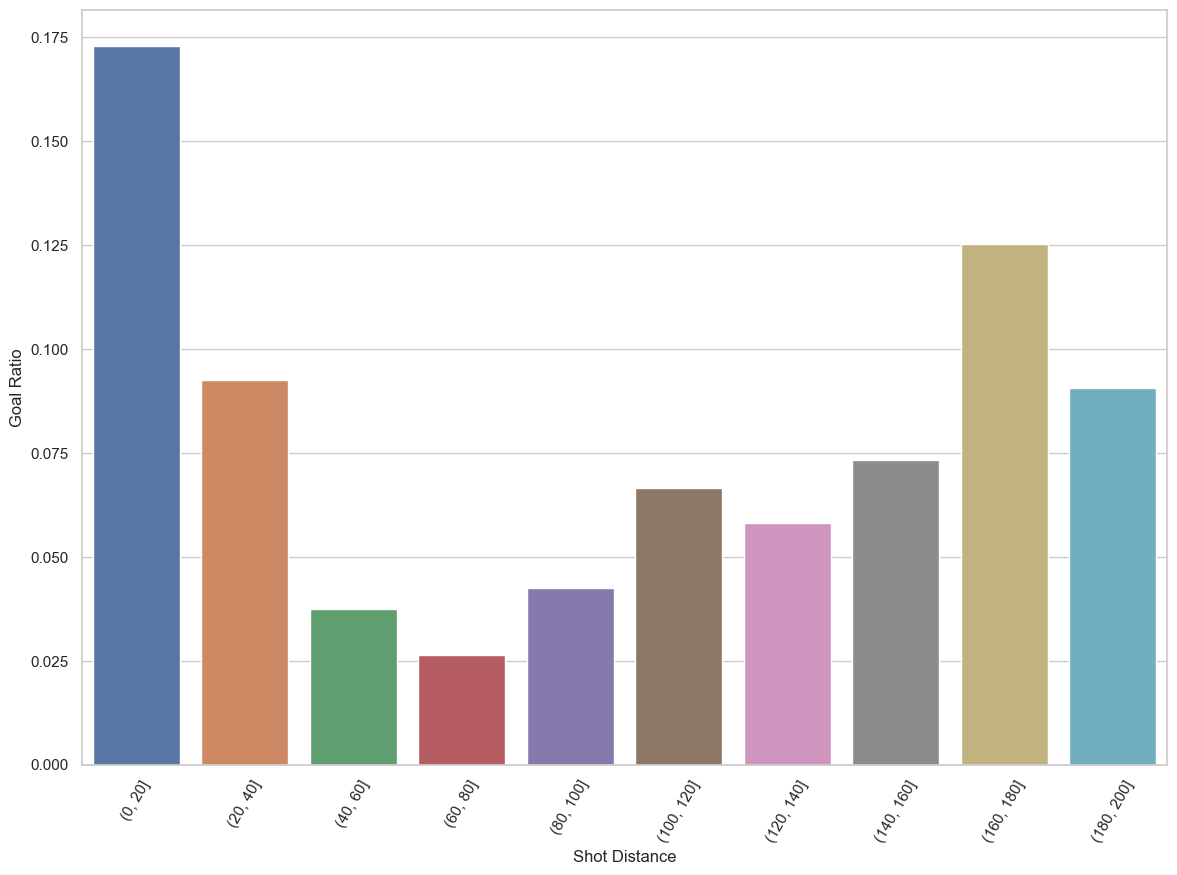

In [21]:
plt.xticks(rotation=60)
ax = sns.barplot( x="dist_goal", y = "goalRate" , data = result)
ax.set(xlabel='Shot Distance', ylabel='Goal Ratio')
ax.get_figure().savefig("m2_q2_2_shot_dist_goal_ratio.png")

### Relate the goal rate, i.e. #goals / (#no_goals + #goals), to the angle of the shot.

In [22]:
data3 = data3.dropna()
minAng = int(data3["angle_goal"].min())
maxAng = int(data3["angle_goal"].max())

bins = list(range(minAng, maxAng + 20, 20))
groups = data3.groupby( [ 'isGoal',  pd.cut( data3["angle_goal"], bins )] )
result = groups.size().unstack().T

In [23]:
result["AngleGoalRate"] = result.apply( lambda x : x[True] / (x.sum() + 1e-8), axis = 1, result_type='expand')
result.reset_index(inplace=True)

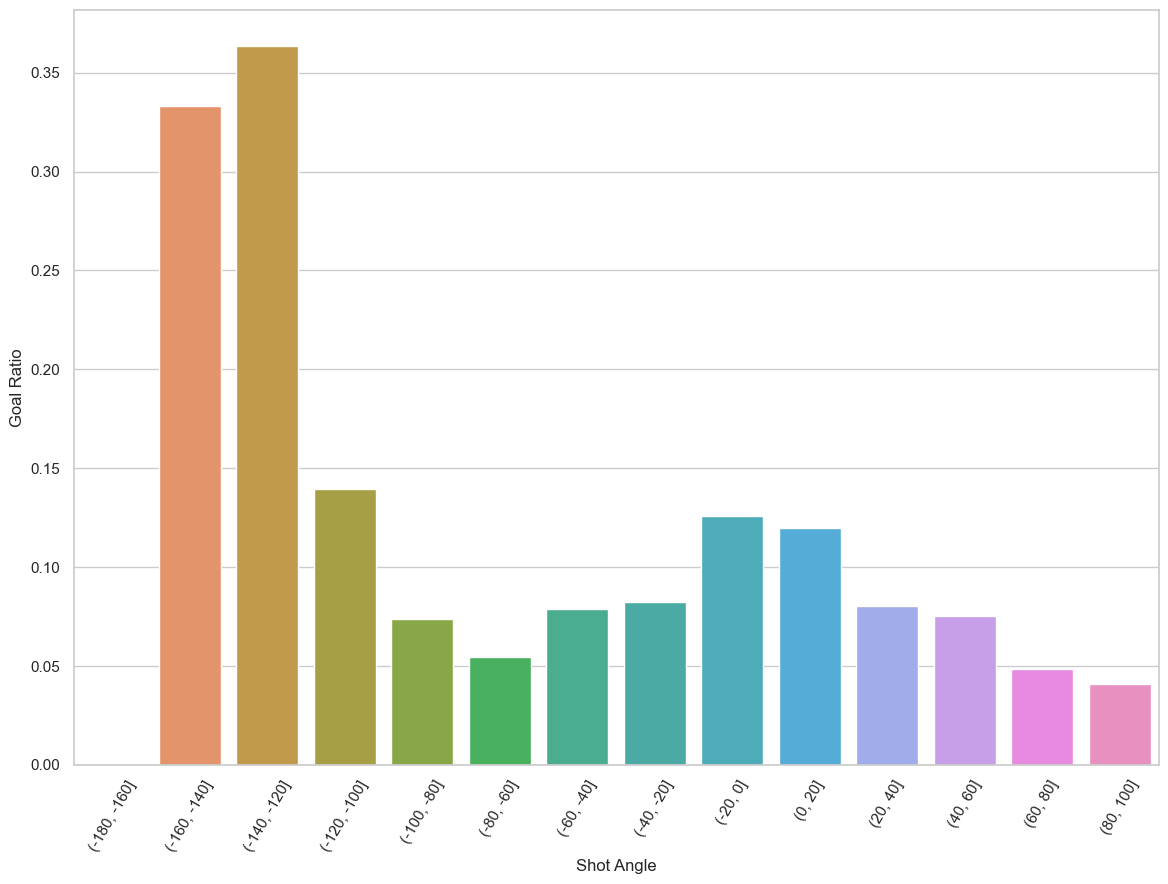

In [24]:
plt.xticks(rotation=60)
ax = sns.barplot( x="angle_goal", y = "AngleGoalRate" , data = result)
ax.set(xlabel='Shot Angle', ylabel='Goal Ratio')
ax.get_figure().savefig("m2_q2_2_shot_angle_goal_ratio.png")

### create another histogram, this time of goals only, binned by distance, and separate empty net and non-empty net events

In [25]:
data4 = df.loc[ df["isGoal"] == True, ["dist_goal", "emptyNet"] ].reset_index()
data4

,index,dist_goal,emptyNet
0,5,38.183766,False
1,19,163.003067,False
2,57,23.0,False
3,65,38.209946,True
4,67,22.472205,False
...,...,...,...
31090,332698,19.235384,False
31091,332704,16.03122,False
31092,332732,23.194827,False
31093,332737,14.764823,False


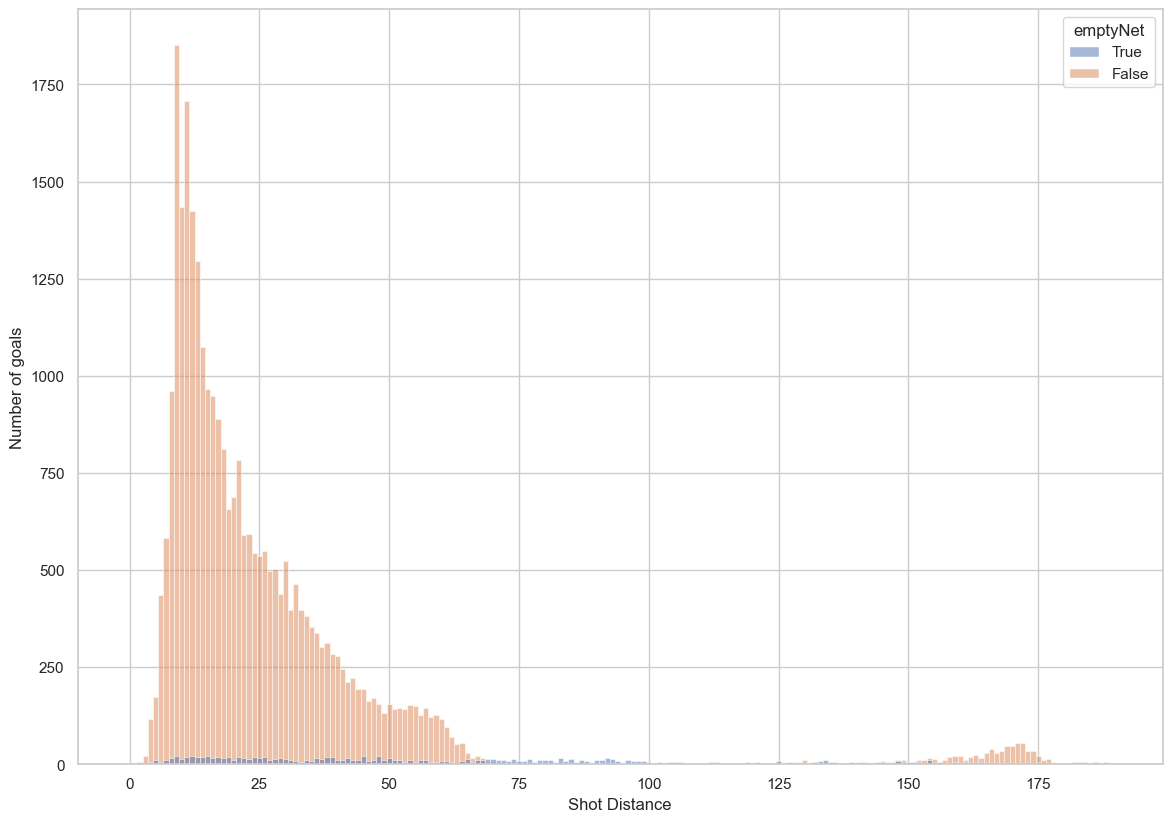

In [26]:
ax = sns.histplot( data4, x = "dist_goal", hue="emptyNet", hue_order = [True, False], bins=20)
ax.set(xlabel='Shot Distance', ylabel='Number of goals')
ax.get_figure().savefig("m2_q2_3_dist_to_emptynet.png")

## 3. Baseline Models (15%)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.calibration import calibration_curve, CalibrationDisplay
import warnings
warnings.filterwarnings('ignore')
import pickle
import os 

In [28]:
data_distance = df[["dist_goal", "isGoal"]].dropna()
data_angle = df[["angle_goal", "isGoal"]].dropna()
data_angle_distance = df[["dist_goal","angle_goal", "isGoal"]].dropna()

In [161]:
def plot(fpr, tpr, roc_auc):
    
    for f,t,r in zip(fpr,tpr,roc_auc):
        
#     plt.figure()
#     lw = 2
#     plt.plot(
#         fpr[0],
#         tpr[0],
#         color="darkorange",
#         lw=lw,
#         label="ROC curve (area = %0.2f) log-reg-distance" % roc_auc[0],
#     )
#     plt.plot(
#         fpr[1],
#         tpr[1],
#         color="royalblue",
#         lw=lw,
#         label="ROC curve (area = %0.2f) log-reg-angle" % roc_auc[1],
#     )
#     plt.plot(
#         fpr[2],
#         tpr[2],
#         color="darkgreen",
#         lw=lw,
#         label="ROC curve (area = %0.2f) log-reg-angle-distance" % roc_auc[2],
#     )
#     plt.plot(
#         fpr[3],
#         tpr[3],
#         color="black",
#         lw=lw,
#         label="ROC curve (area = %0.2f) Random" % roc_auc[3],
#     )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC of All 4 classifiers")
    plt.legend(loc="lower right")
#     plt.savefig('./figures/q35_Merging_ROC.png')
    plt.show()

    


def model(clf, X_test):
    #model percentile
    for c,x in zip(clf,X_test):
        lr_probs = c.predict_proba(x)[:,1]
        n = len(lr_probs)
        x_axis = np.arange(n)[::-1]*(100/n)
        #print(x_axis)

        print(lr_probs)
        lr_probs_y = lr_probs[::-1]
        lr_probs_y[::-1].sort()
        # print(sum(lr_probs_y))
        #print(lr_probs_y)
        lr_probs_y_sum = np.cumsum(lr_probs_y)
    #lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

    #print(lr_probs_y_sum)
    #goal rate

    plt.figure()
    plt.plot(
        x_axis,
        lr_probs_y,
    )
    plt.xlim([100, 0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("Shot prob model percentile")
    plt.ylabel("Goals / (Shots + Goals)")
    plt.title("Goal Rate of Logistic Regression (Angle)")
#     plt.savefig('./figures/q33_logR_GR.png')
    plt.show()

    #cumulative plot
    plt.figure()
    plt.plot(
        x_axis,
        lr_probs_y_sum/sum(lr_probs_y),
    )
    plt.xlim([100, 0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("Shot prob model percentile")
    plt.ylabel("Proportion")
    plt.title("Cumulative % of goals")
#     plt.savefig('./figures/q33_logR_CP.png')
    plt.show()


IndentationError: expected an indented block (1656023762.py, line 35)

AttributeError: 'numpy.ndarray' object has no attribute 'predict_proba'

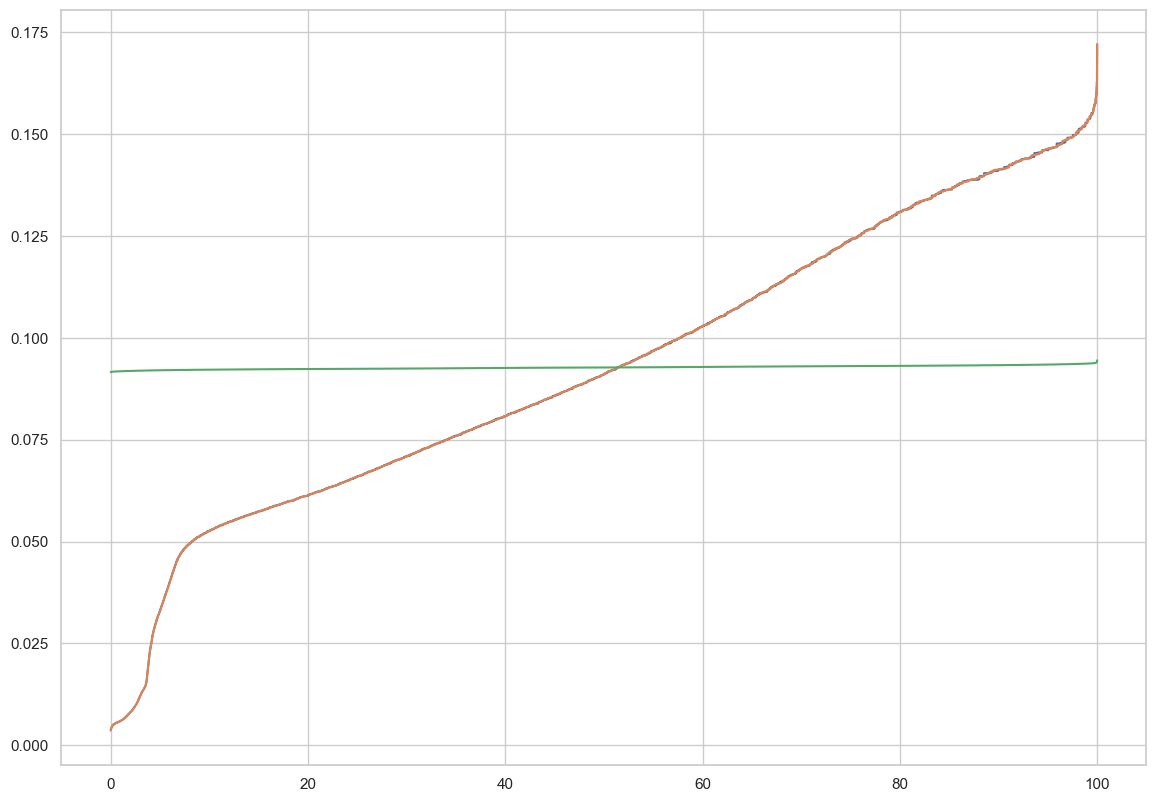

In [198]:
def plot(fpr, tpr, roc_auc, string):
    lw = 2
    plt.figure()
    colrs = ['darkorange', 'darkred', 'darkgreen', 'black'] 
    labels = ['log-reg-distance', 'log-reg-angle', 'log-reg-angle-distance', 'Random' ]
    
    for f,t,r,c,label in zip(fpr,tpr,roc_auc, colrs,labels):
        plt.plot(
            f, t, 
            color=c,
            lw=lw,
            label="ROC curve (area = %0.2f)".format(label) % r
        )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC of All 4 classifiers")
    plt.legend(loc="lower right")
    #plt.savefig('./figures/' + str )
    plt.show()

def calibration(y_test, y_labels, s , n_bins = [300,3000,300,300]):
    labels = ['log-reg-distance', 'log-reg-angle', 'log-reg-angle-distance', 'Random' ]
    plt.figure()
    ax = plt.axes()
    for y_true, y_pred, label, n_bin in zip(y_test, y_labels, labels, n_bins):
        disp = CalibrationDisplay.from_predictions(y_true, y_pred,n_bins=n_bin,ax=ax, name = label )
    
    #plt.savefig('./figures/' + s)

def model(clf, X_test):
    #model percentile
    plt.figure()
    for c,x in zip(clf,X_test):
        lr_probs = c.predict_proba(x)[:,1]
        n = len(lr_probs)
        x_axis = np.arange(n)[::-1]*(100/n)
        #print(lr_probs)
        lr_probs_y = lr_probs[::-1]
        lr_probs_y[::-1].sort()
        # print(sum(lr_probs_y))
        #print(lr_probs_y)
        lr_probs_y_sum = np.cumsum(lr_probs_y)
    #lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

    #print(lr_probs_y_sum)
    #goal rate

        
        plt.plot(
            x_axis,
            lr_probs_y,
        )
    plt.xlim([100, 0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("Shot prob model percentile")
    plt.ylabel("Goals / (Shots + Goals)")
    plt.title("Goal Rate of Logistic Regression (Angle)")
#     plt.savefig('./figures/q33_logR_GR.png')
    plt.show()

    #cumulative plot
    plt.figure()
    for c,x in zip(clf,X_test):
        plt.plot(
            x_axis,
            lr_probs_y_sum/sum(lr_probs_y),
        )
    plt.xlim([100, 0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("Shot prob model percentile")
    plt.ylabel("Proportion")
    plt.title("Cumulative % of goals")
#     plt.savefig('./figures/q33_logR_CP.png')
    plt.show()
    

model([clf, clf_angle_distance, clf_angle, zero], [X_test_d, X_test_ad, X_test_a, X_test_ad])

In [ ]:
calibration([y_test_ad], [one])

# Logistic regression with distance only

In [35]:
#Logistic regression with distance only
X = data_distance[["dist_goal"]]
y = data_distance["isGoal"].apply( lambda x : 1 if x else 0 )
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, y, test_size=0.33, random_state=42)
clf = LogisticRegression(random_state=0).fit(X_train_d, y_train_d)
y_pred = clf.predict(X_test_d)
print(clf.predict_proba(X_test_d))
clf.score(X_test_d, y_test_d)

print("The classification report is as follows:\n", classification_report(y_test_d,y_pred))

f1 = f1_score(y_test_d, y_pred)
precision = precision_score(y_test_d, y_pred)
recall = recall_score(y_test_d, y_pred)

# Saving the model 

# save the classifier
location = os.getcwd() +'/models'
fullpath = os.path.join(location)
with open(fullpath + '/Q31_log_reg_distance.pkl', 'wb') as fid:
    pickle.dump(clf, fid) 

[[0.88232215 0.11767785]
 [0.85597761 0.14402239]
 [0.93180173 0.06819827]
 ...
 [0.8668368  0.1331632 ]
 [0.9100268  0.0899732 ]
 [0.93012523 0.06987477]]
The classification report is as follows:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     99390
           1       0.00      0.00      0.00     10409

    accuracy                           0.91    109799
   macro avg       0.45      0.50      0.48    109799
weighted avg       0.82      0.91      0.86    109799



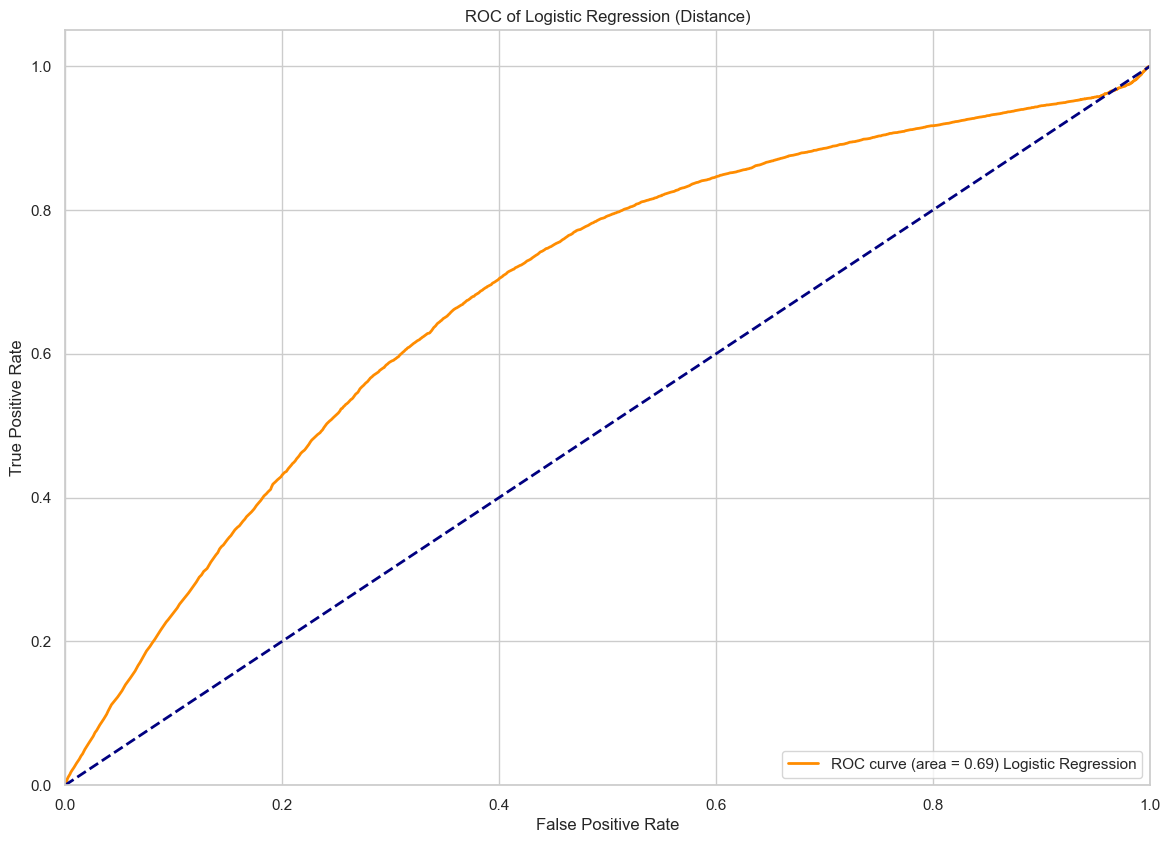

In [78]:
from sklearn.metrics import roc_curve, auc

y_score = clf.predict_proba(X_test_d)[:,1]
fpr_d, tpr_d, _ = roc_curve(y_test_d, y_score)
roc_auc_d = auc(fpr_d, tpr_d)

plt.figure()
lw = 2
plt.plot(
    fpr_d,
    tpr_d,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f) Logistic Regression" % roc_auc_d,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Logistic Regression (Distance)")
plt.legend(loc="lower right")

plt.savefig('./figures/q31_logR_ROC_distance.png')
plt.show()

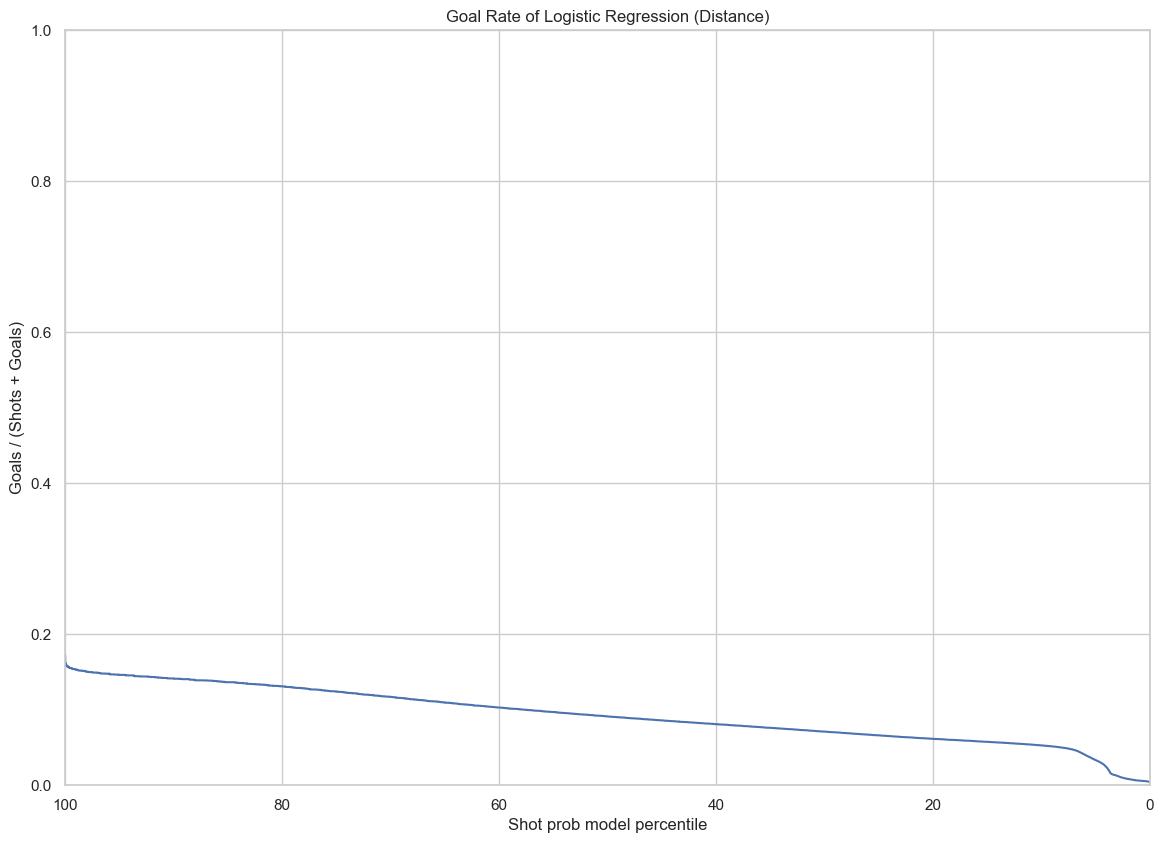

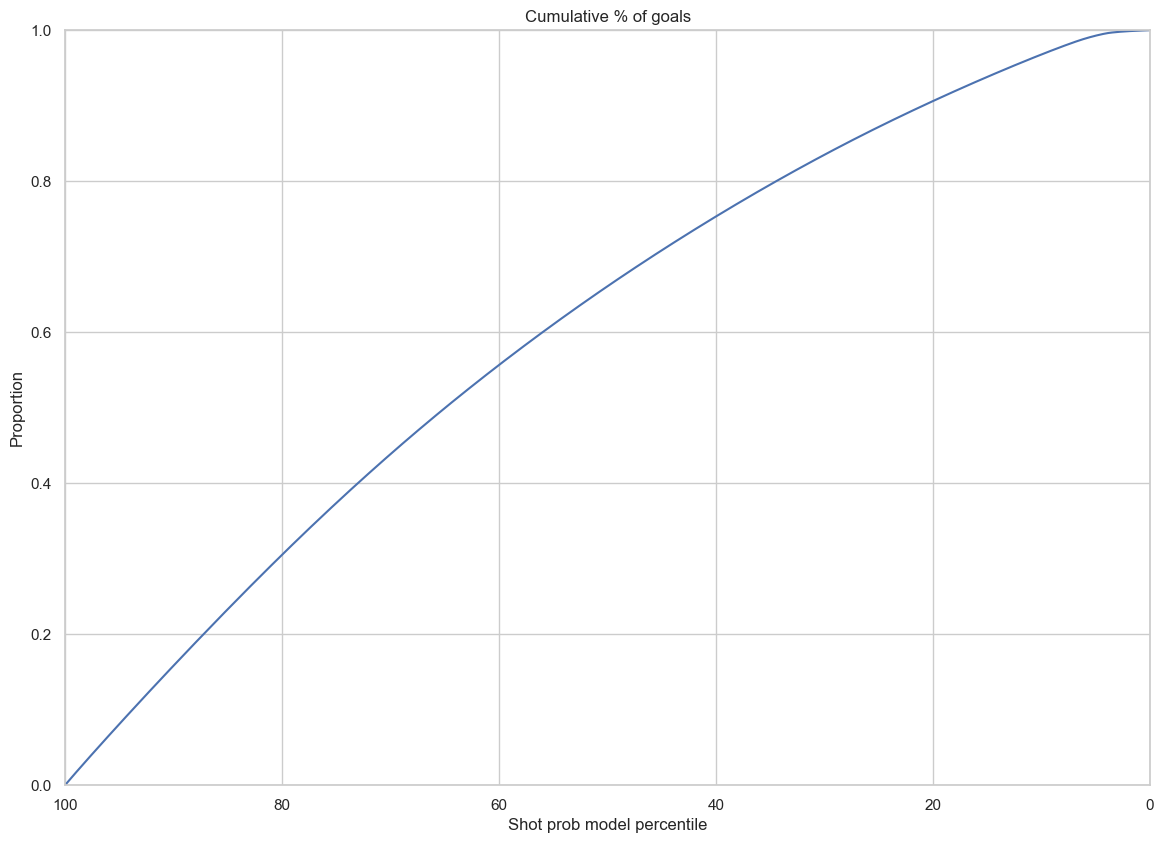

In [37]:
#model percentile
lr_probs = clf.predict_proba(X_test_d)[:,1]
n = len(lr_probs)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

#print(lr_probs)
lr_probs_y = lr_probs[:]
lr_probs_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
lr_probs_y_sum = np.cumsum(lr_probs_y)
#lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

#print(lr_probs_y_sum)
#goal rate

plt.figure()
plt.plot(
    x_axis,
    lr_probs_y,
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of Logistic Regression (Distance)")
plt.savefig('./figures/q31_logR_GR.png')
plt.show()

#cumulative plot
plt.figure()
plt.plot(
    x_axis,
    lr_probs_y_sum/sum(lr_probs_y),
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.savefig('./figures/q31_logR_CP.png')
plt.show()

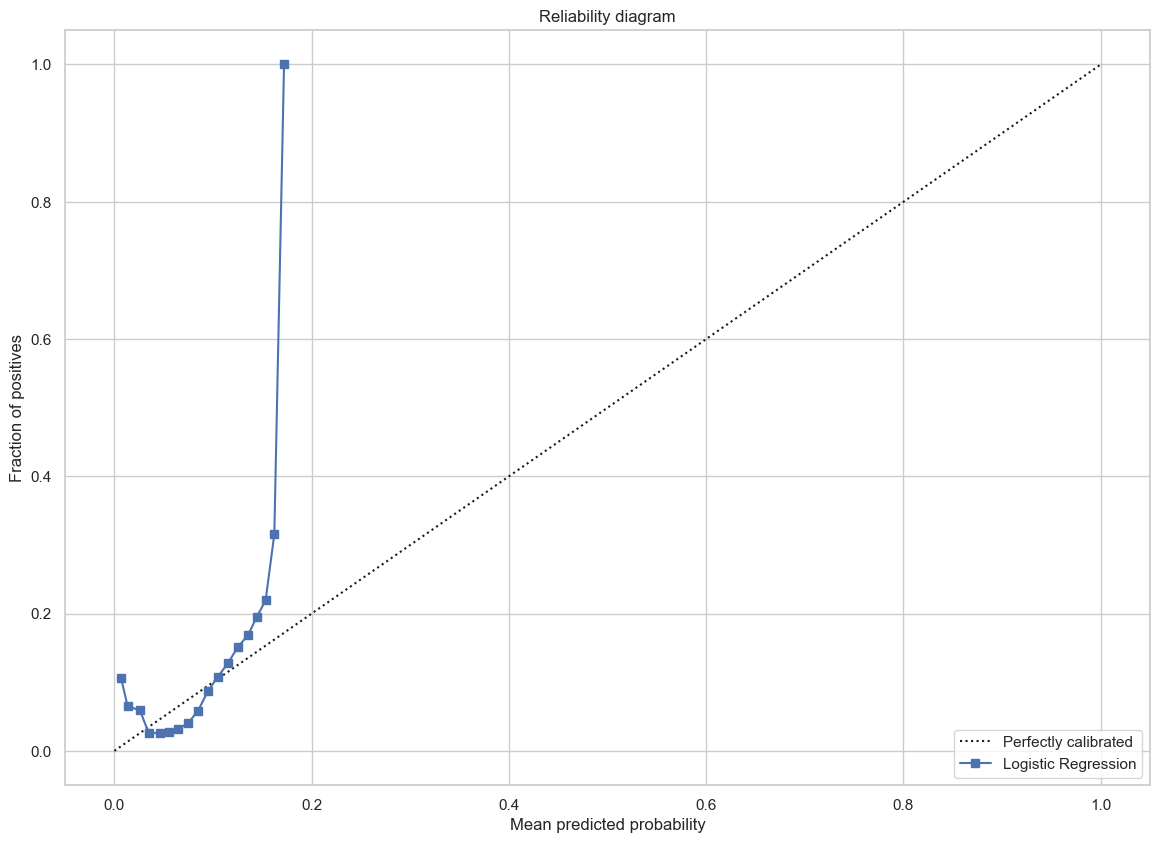

In [38]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_estimator(clf, X_test_d, y_test_d, name='Logistic Regression', n_bins = 100)
plt.title("Reliability diagram")
plt.savefig('./figures/31_logR_RD_Distance.png')
plt.show()

# Logistic Regression, trained on angle only

In [39]:
# Log reg trained on angle only 
X_angle = data_angle[["angle_goal"]]
y_angle = data_angle["isGoal"].apply( lambda x : 1 if x else 0 )
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_angle, y_angle, test_size=0.33, random_state=42)
clf_angle = LogisticRegression(random_state=0).fit(X_train_a, y_train_a)
y_pred_angle = clf_angle.predict(X_test_a)
print(clf_angle.predict_proba(X_test_a))
clf_angle.score(X_test_a, y_test_a)

print("The classification report is as follows:\n", classification_report(y_test_a,y_pred_angle))

f1_angle = f1_score(y_test_a, y_pred_angle)
precision_angle = precision_score(y_test_a, y_pred_angle)
recall_angle = recall_score(y_test_a, y_pred_angle)

# Saving the model 

# save the classifier
location = os.getcwd() +'/models'
fullpath = os.path.join(location)
with open(fullpath + '/Q32_log_reg_angle.pkl', 'wb') as fid:
    pickle.dump(clf_angle, fid) 

[[0.90695355 0.09304645]
 [0.90726829 0.09273171]
 [0.90670884 0.09329116]
 ...
 [0.90741814 0.09258186]
 [0.9068385  0.0931615 ]
 [0.90719453 0.09280547]]
The classification report is as follows:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     99390
           1       0.00      0.00      0.00     10409

    accuracy                           0.91    109799
   macro avg       0.45      0.50      0.48    109799
weighted avg       0.82      0.91      0.86    109799



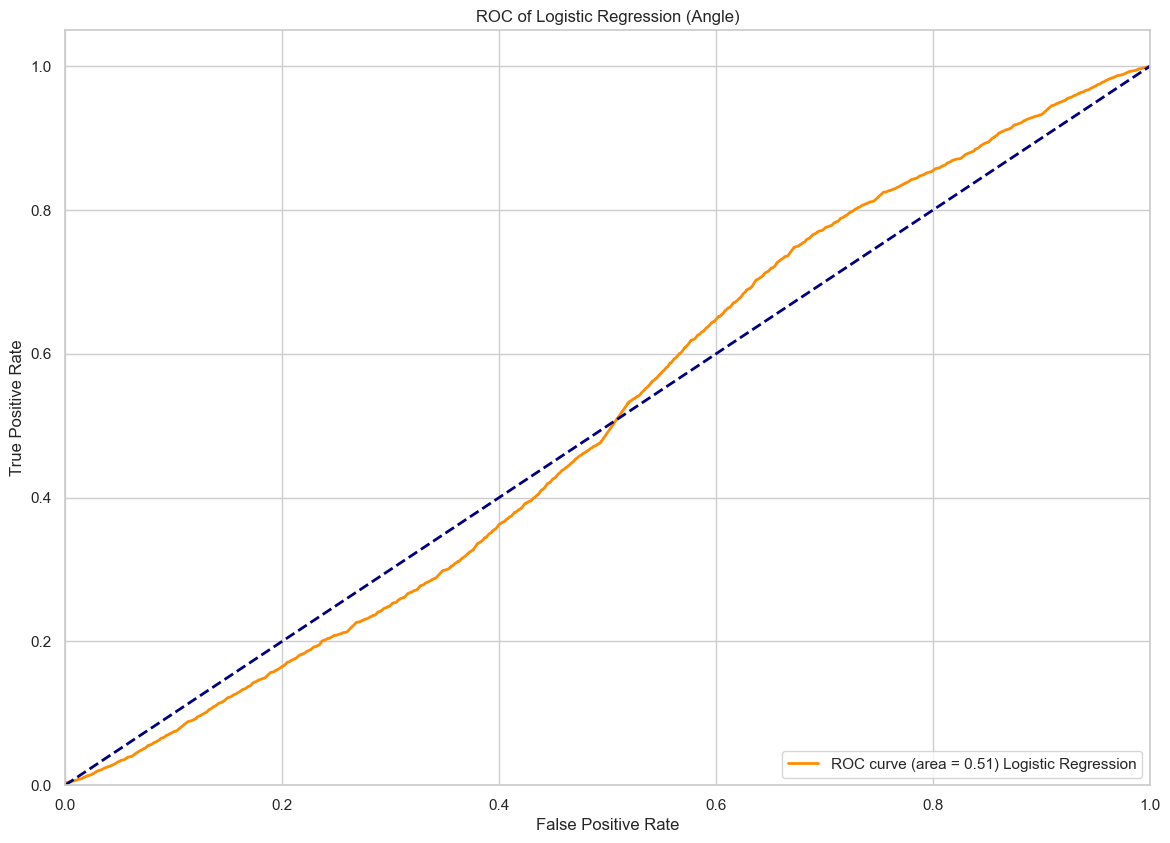

In [79]:
y_score = clf_angle.predict_proba(X_test_a)[:,1]
fpr_a, tpr_a, _ = roc_curve(y_test_a, y_score)
roc_auc_a = auc(fpr_a, tpr_a)

plt.figure()
lw = 2
plt.plot(
    fpr_a,
    tpr_a,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f) Logistic Regression" % roc_auc_a,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Logistic Regression (Angle)")
plt.legend(loc="lower right")

plt.savefig('./figures/q32_logR_ROC_angle.png')
plt.show()

[0.09304645 0.09273171 0.09329116 ... 0.09258186 0.0931615  0.09280547]


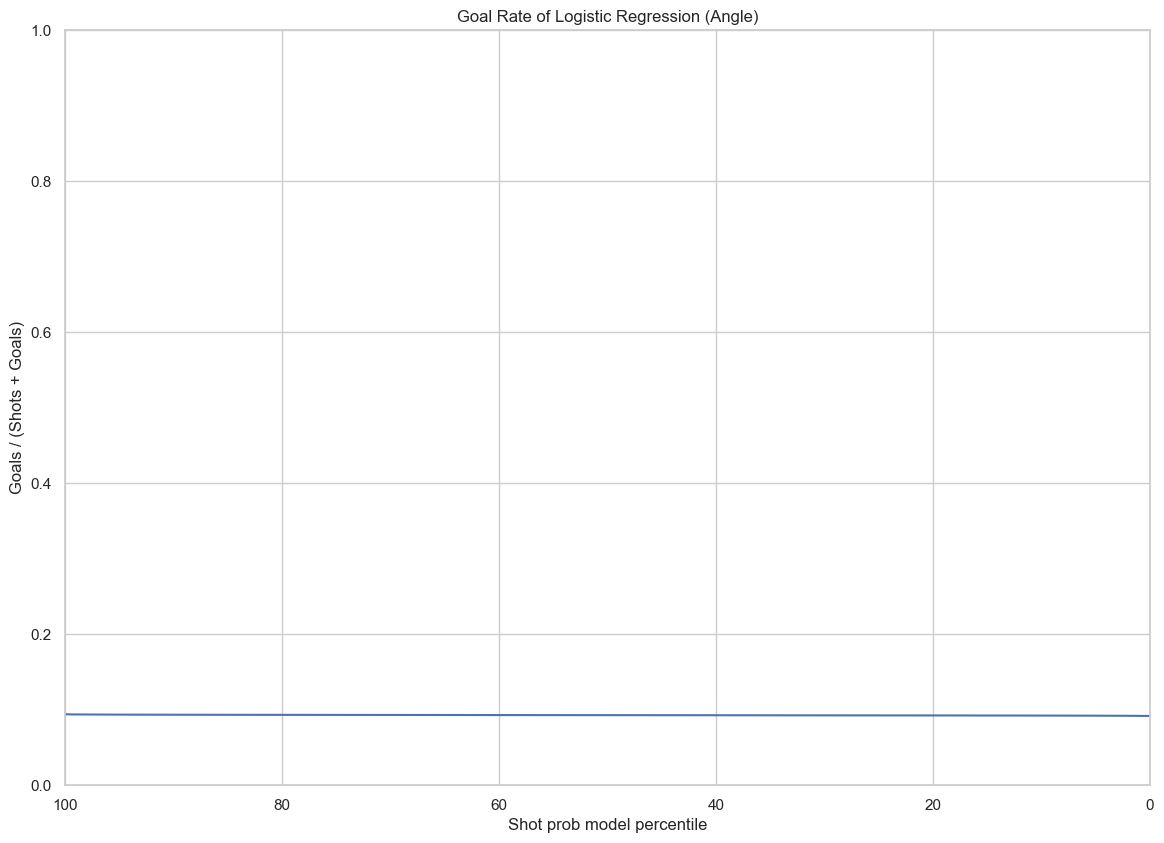

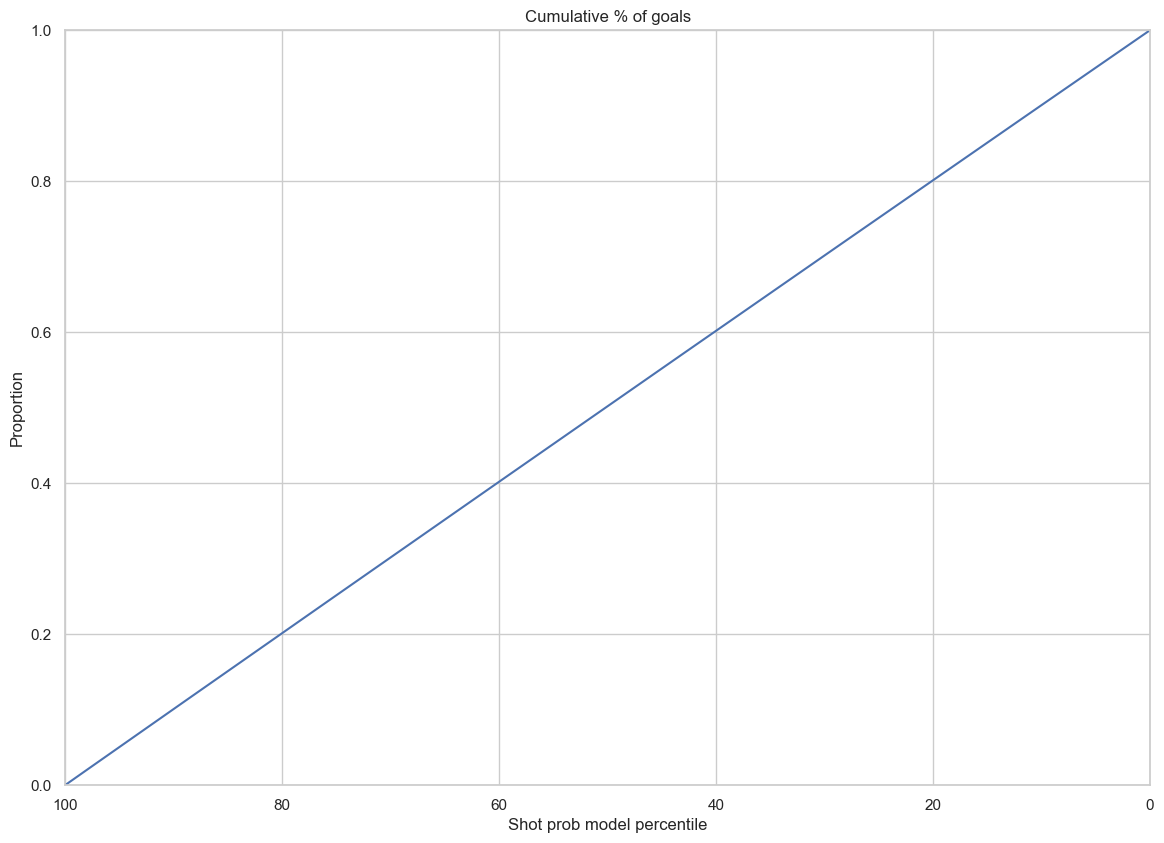

In [41]:
#model percentile
lr_probs = clf_angle.predict_proba(X_test_a)[:,1]
n = len(lr_probs)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

print(lr_probs)
lr_probs_y = lr_probs[::-1]
lr_probs_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
lr_probs_y_sum = np.cumsum(lr_probs_y)
#lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

#print(lr_probs_y_sum)
#goal rate

plt.figure()
plt.plot(
    x_axis,
    lr_probs_y,
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of Logistic Regression (Angle)")
plt.savefig('./figures/q32_logR_GR.png')
plt.show()

#cumulative plot
plt.figure()
plt.plot(
    x_axis,
    lr_probs_y_sum/sum(lr_probs_y),
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.savefig('./figures/q32_logR_CP.png')
plt.show()

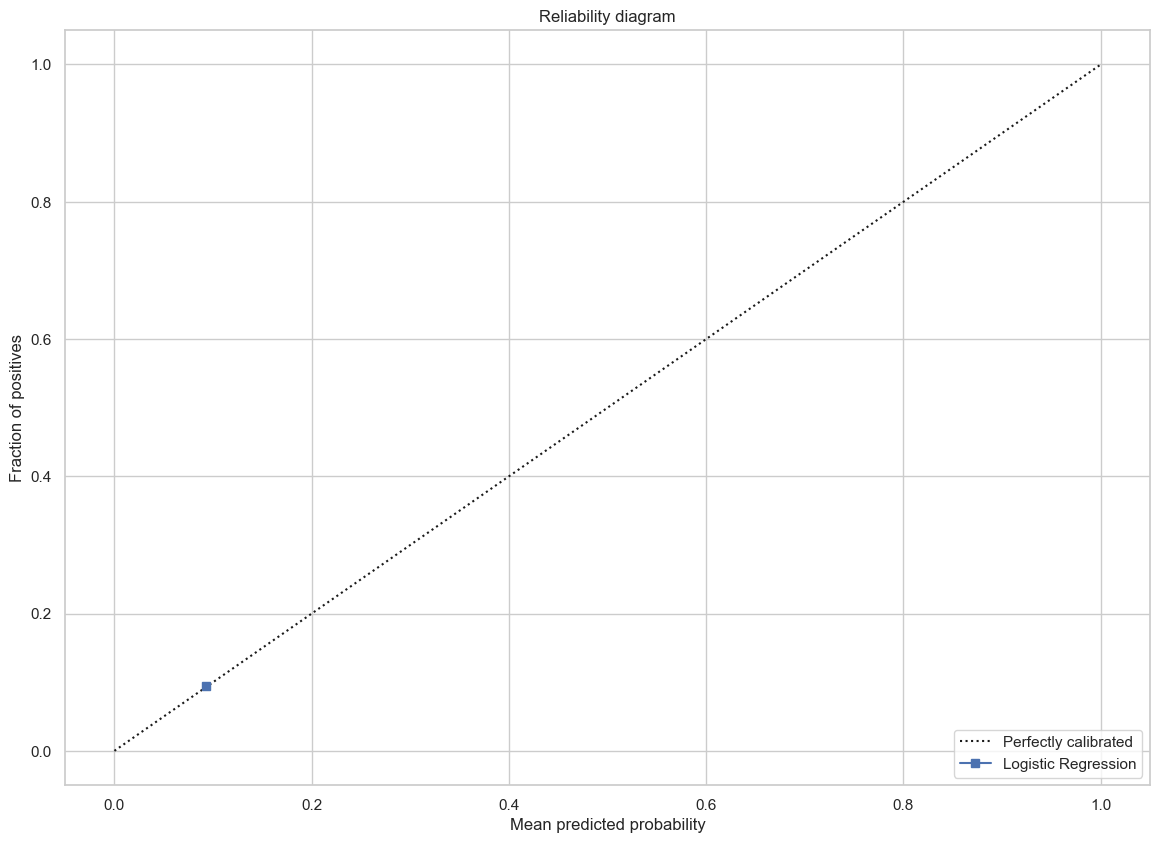

In [44]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_estimator(clf_angle, X_test_a, y_test_a, name='Logistic Regression')
plt.title("Reliability diagram")
plt.savefig('./figures/32_logR_RD_Angle.png')
plt.show()

# Logistic Regression, trained on both distance and angle

In [45]:
X_angle_distance = data_angle_distance[["dist_goal","angle_goal"]]
y_angle_distance = data_angle_distance["isGoal"].apply( lambda x : 1 if x else 0 )
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_angle_distance, y_angle_distance, test_size=0.33, random_state=42)
clf_angle_distance = LogisticRegression(random_state=0).fit(X_train_ad, y_train_ad)
y_pred_angle_distance = clf_angle_distance.predict(X_test_ad)
print(clf_angle_distance.predict_proba(X_test_ad))
clf_angle_distance.score(X_test_ad, y_test_ad)

print("The classification report is as follows:\n", classification_report(y_test_ad,y_pred))

f1_angle_distance = f1_score(y_test_ad, y_pred_angle_distance)
precision_angle_distance = precision_score(y_test_ad, y_pred_angle_distance)
recall_angle_distance = recall_score(y_test_ad, y_pred_angle_distance)

# Saving the model 

# save the classifier
location = os.getcwd() +'/models'
fullpath = os.path.join(location)
with open(fullpath + '/Q33_log_reg_distance_angle.pkl', 'wb') as fid:
    pickle.dump(clf_angle_distance, fid) 

[[0.88282645 0.11717355]
 [0.85591628 0.14408372]
 [0.93238985 0.06761015]
 ...
 [0.86649841 0.13350159]
 [0.91059498 0.08940502]
 [0.93020572 0.06979428]]
The classification report is as follows:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     99390
           1       0.00      0.00      0.00     10409

    accuracy                           0.91    109799
   macro avg       0.45      0.50      0.48    109799
weighted avg       0.82      0.91      0.86    109799



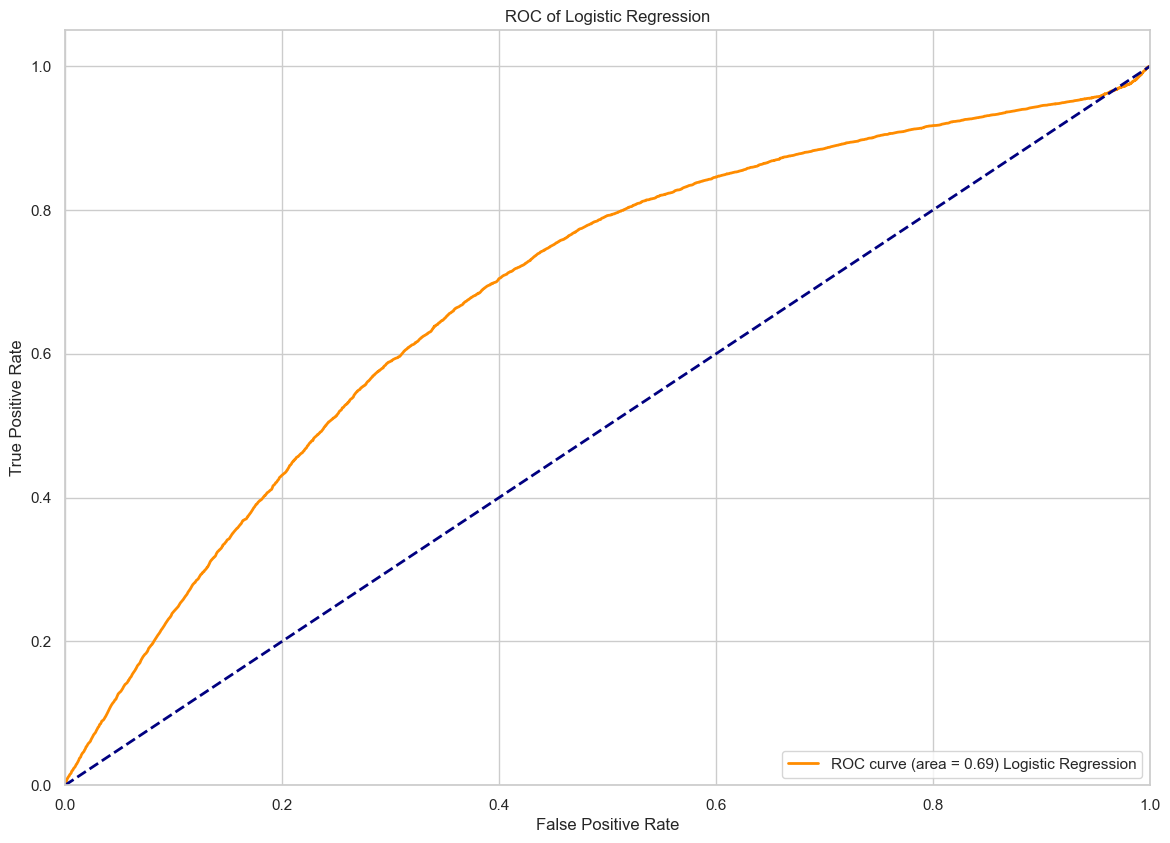

In [80]:
y_score = clf_angle_distance.predict_proba(X_test_ad)[:,1]
fpr_ad, tpr_ad, _ = roc_curve(y_test_a, y_score)
roc_auc_ad = auc(fpr_ad, tpr_ad)

plt.figure()
lw = 2
plt.plot(
    fpr_ad,
    tpr_ad,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f) Logistic Regression" % roc_auc_ad,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Logistic Regression")
plt.legend(loc="lower right")

plt.savefig('./figures/q33_logR_ROC_angle_distance.png')
plt.show()

[0.11717355 0.14408372 0.06761015 ... 0.13350159 0.08940502 0.06979428]


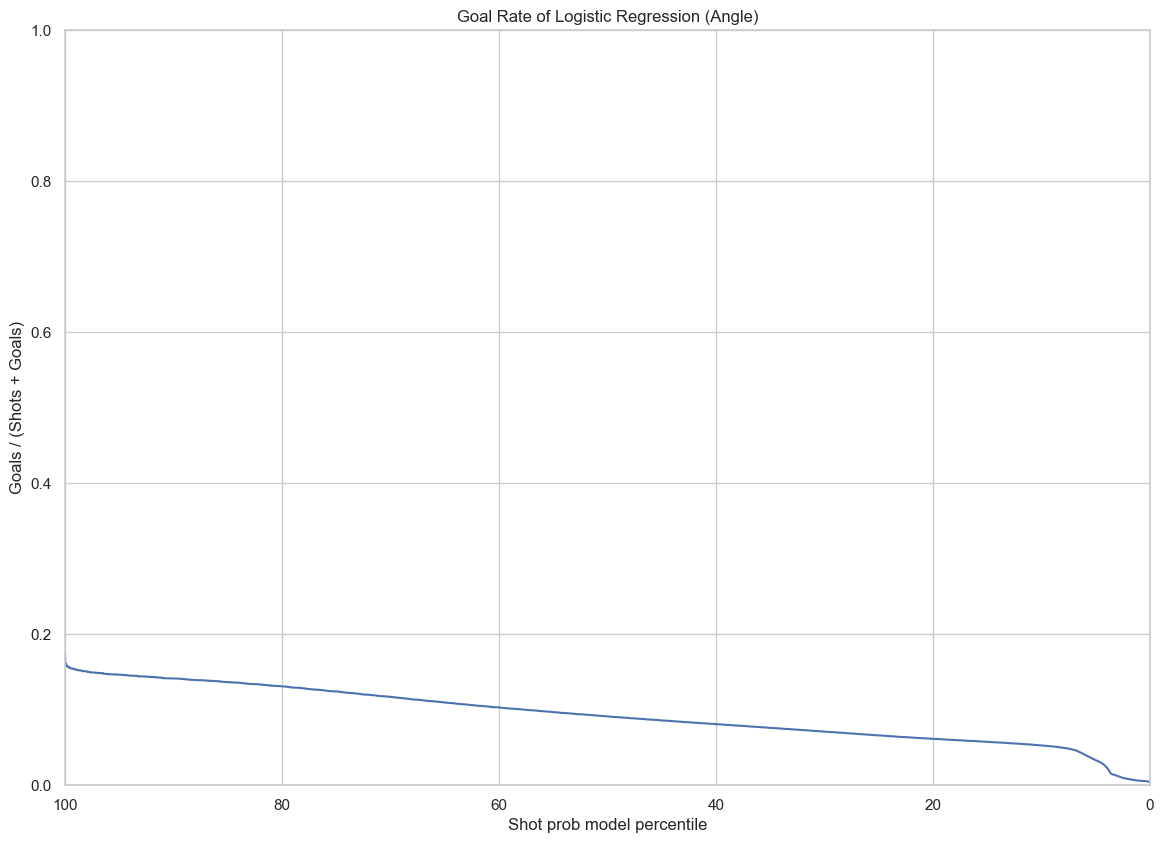

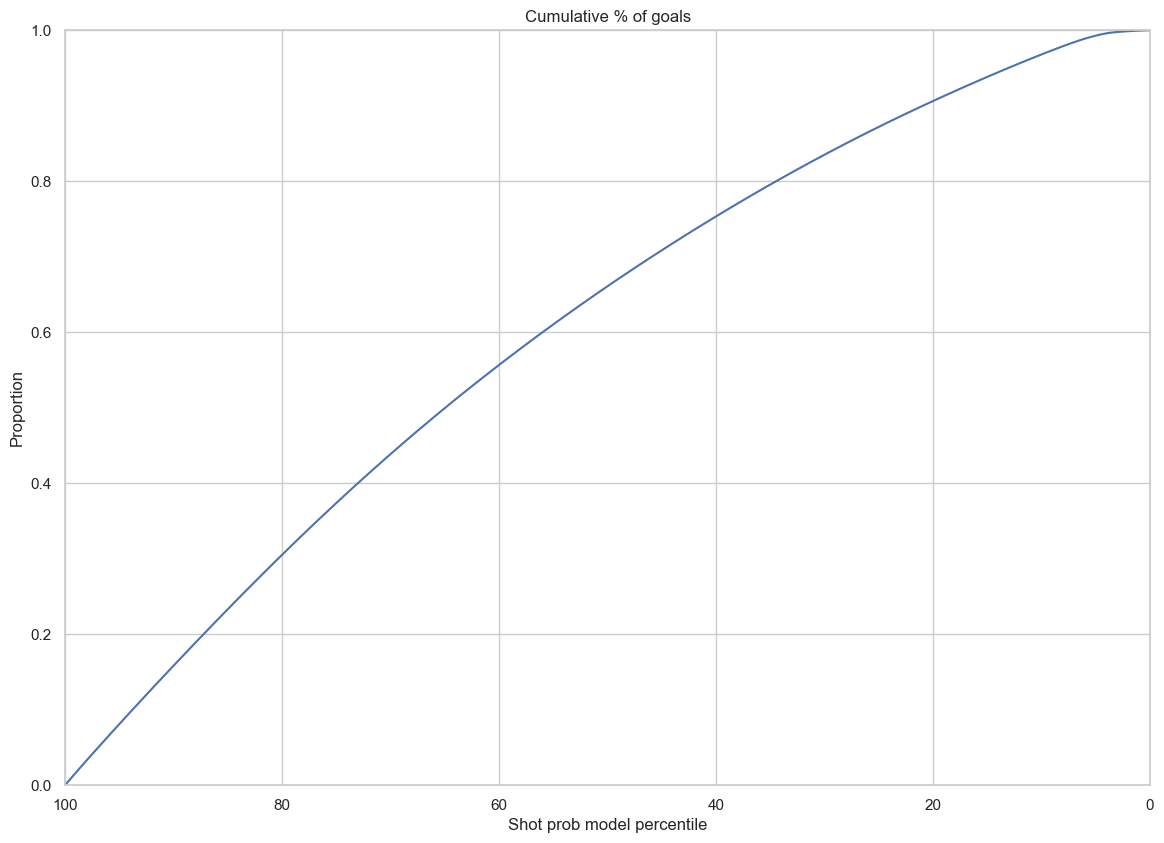

In [47]:
#model percentile
lr_probs = clf_angle_distance.predict_proba(X_test_ad)[:,1]
n = len(lr_probs)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

print(lr_probs)
lr_probs_y = lr_probs[::-1]
lr_probs_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
lr_probs_y_sum = np.cumsum(lr_probs_y)
#lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

#print(lr_probs_y_sum)
#goal rate

plt.figure()
plt.plot(
    x_axis,
    lr_probs_y,
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of Logistic Regression (Angle)")
plt.savefig('./figures/q33_logR_GR.png')
plt.show()

#cumulative plot
plt.figure()
plt.plot(
    x_axis,
    lr_probs_y_sum/sum(lr_probs_y),
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.savefig('./figures/q33_logR_CP.png')
plt.show()

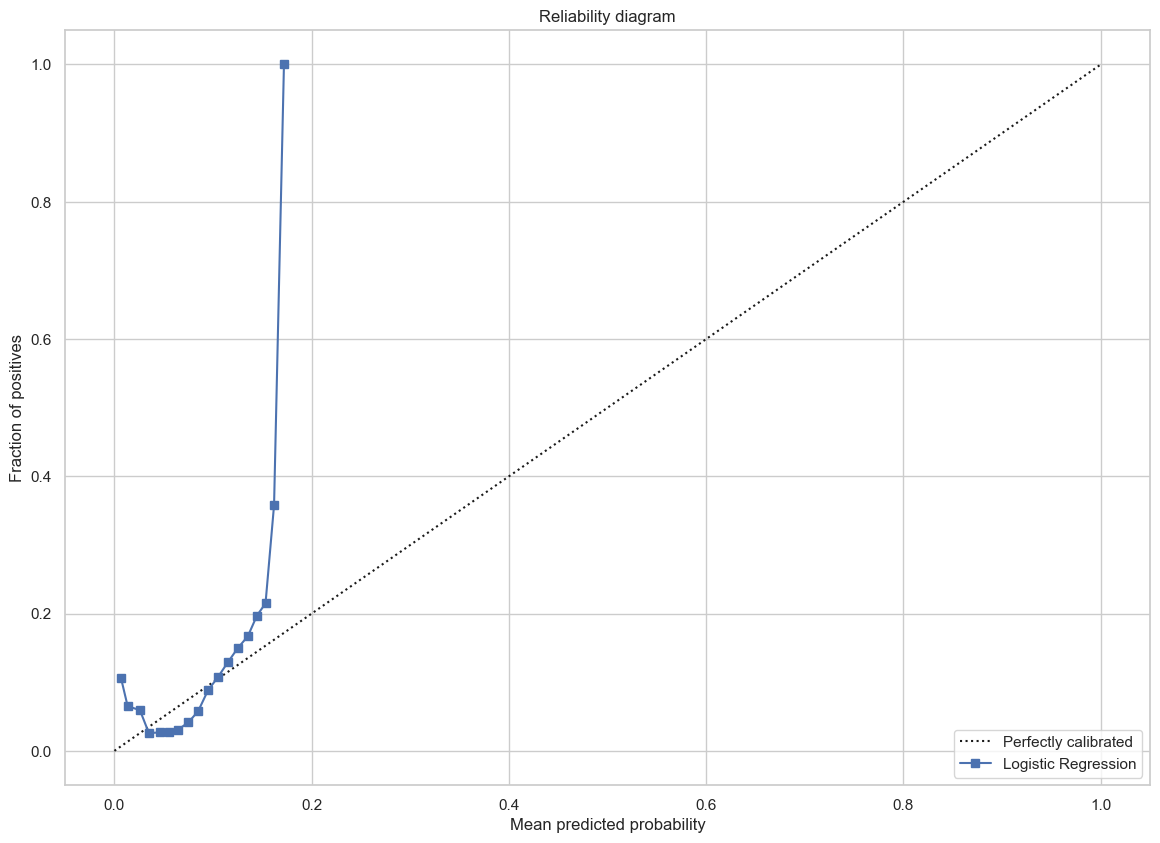

In [48]:
disp = CalibrationDisplay.from_estimator(clf_angle_distance, X_test_ad, y_test_ad, name='Logistic Regression', n_bins = 100)
plt.title("Reliability diagram")
plt.savefig('./figures/33_logR_RD_angle_distance.png')
plt.show()

## Doing Random baseline: rather than training a classifier, the predicted probability is sampled from a uniform distribution, i.e. yiU(0,1)

[0.44996504 0.03373486 0.41593621 ... 0.53194054 0.14574815 0.62552309]
[0.55003496 0.96626514 0.58406379 ... 0.46805946 0.85425185 0.37447691]


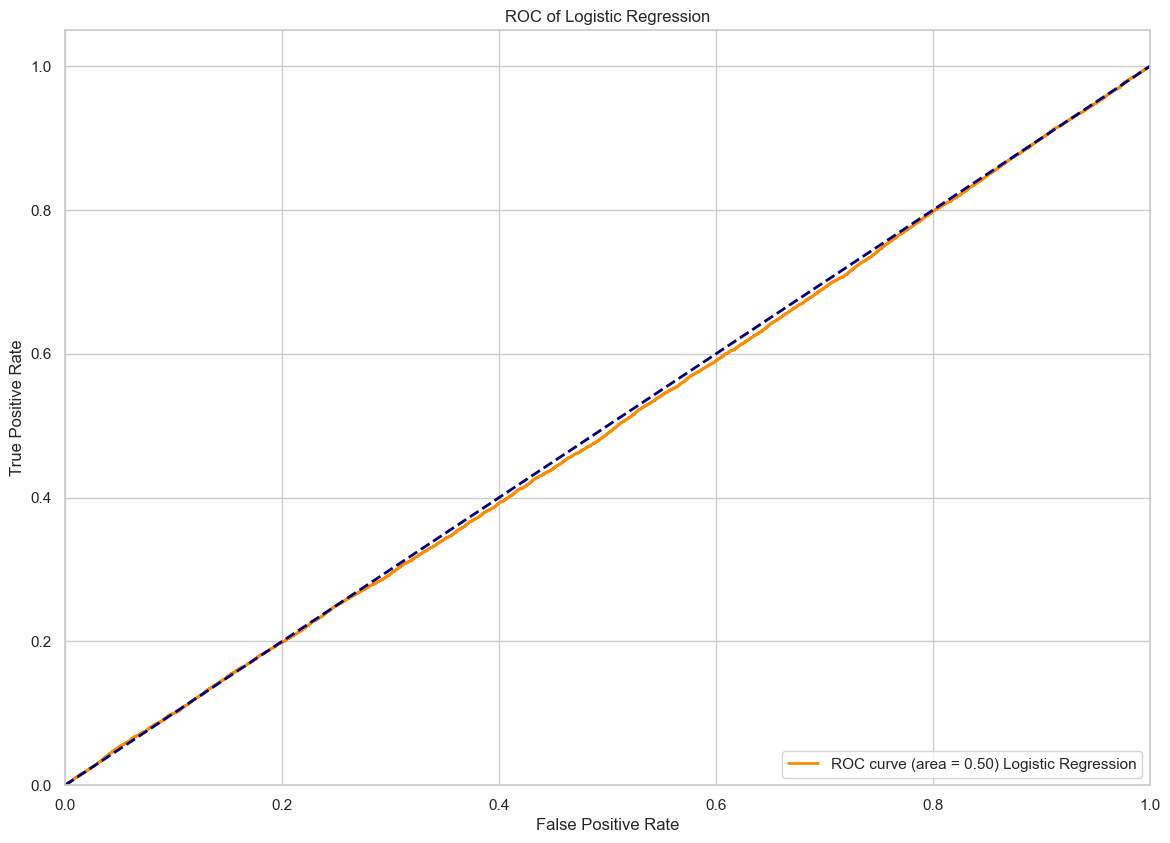

In [81]:
one = np.random.uniform(low=0.0, high=1.0, size= X_test_ad.shape[0])
zero = 1 - one

print(one)
print(zero)

fpr_r, tpr_r, _ = roc_curve(y_test_ad, zero)
roc_auc_r = auc(fpr_r, tpr_r)

plt.figure()
lw = 2
plt.plot(
    fpr_r,
    tpr_r,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f) Logistic Regression" % roc_auc_r,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Logistic Regression")
plt.legend(loc="lower right")

plt.savefig('./figures/q34_Random.png')
plt.show()

[0.93913949 0.769723   0.53947136 ... 0.07581997 0.25897921 0.96627048]


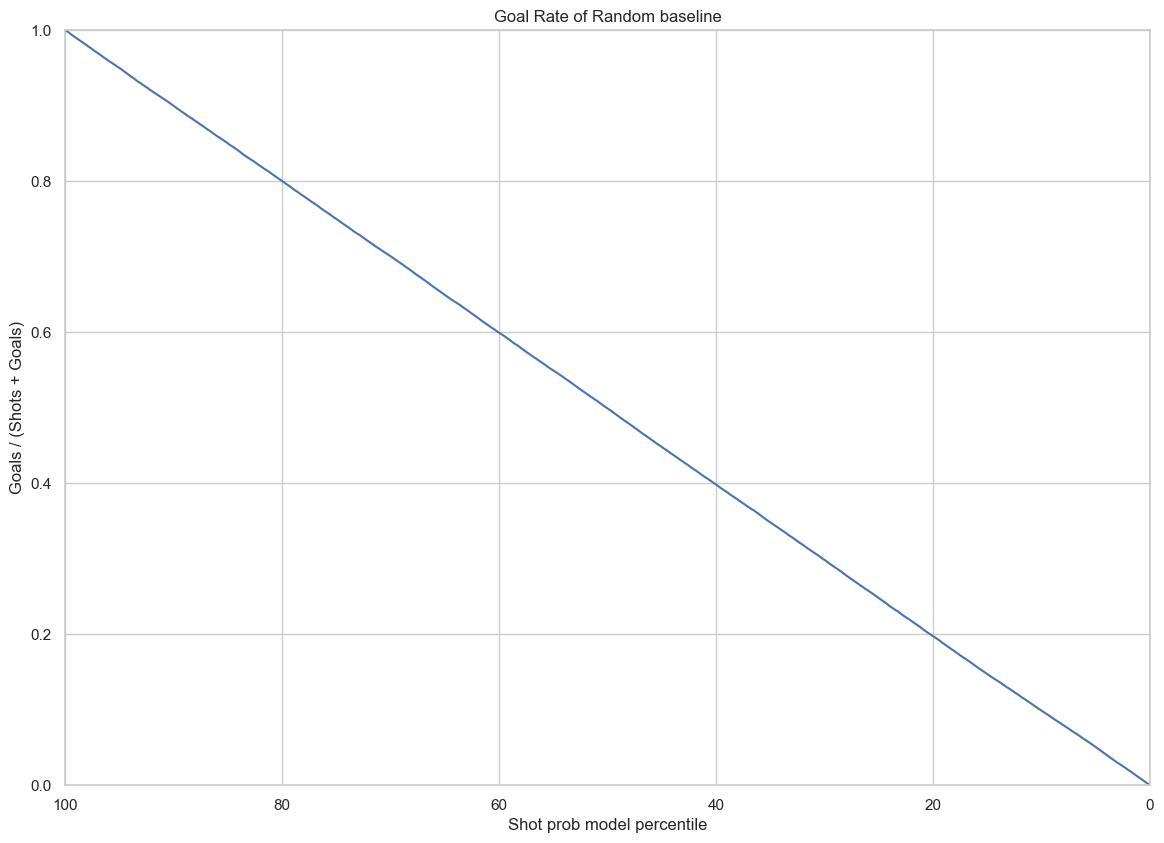

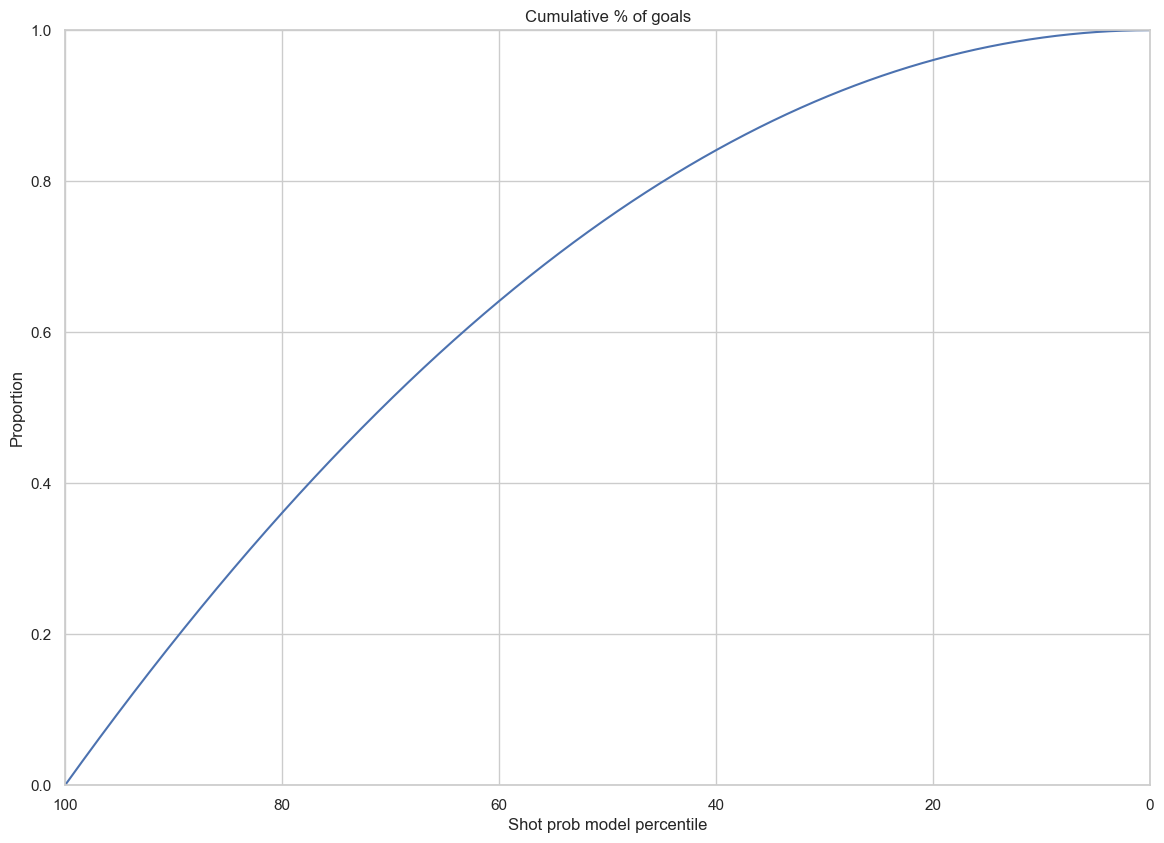

In [50]:
#model percentile
lr_probs = zero
n = len(lr_probs)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

print(lr_probs)
lr_probs_y = lr_probs[::-1]
lr_probs_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
lr_probs_y_sum = np.cumsum(lr_probs_y)
#lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

#print(lr_probs_y_sum)
#goal rate

plt.figure()
plt.plot(
    x_axis,
    lr_probs_y,
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of Random baseline")
plt.savefig('./figures/q34_Random_GR.png')
plt.show()

#cumulative plot
plt.figure()
plt.plot(
    x_axis,
    lr_probs_y_sum/sum(lr_probs_y),
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.savefig('./figures/q34_Random_CP.png')
plt.show()

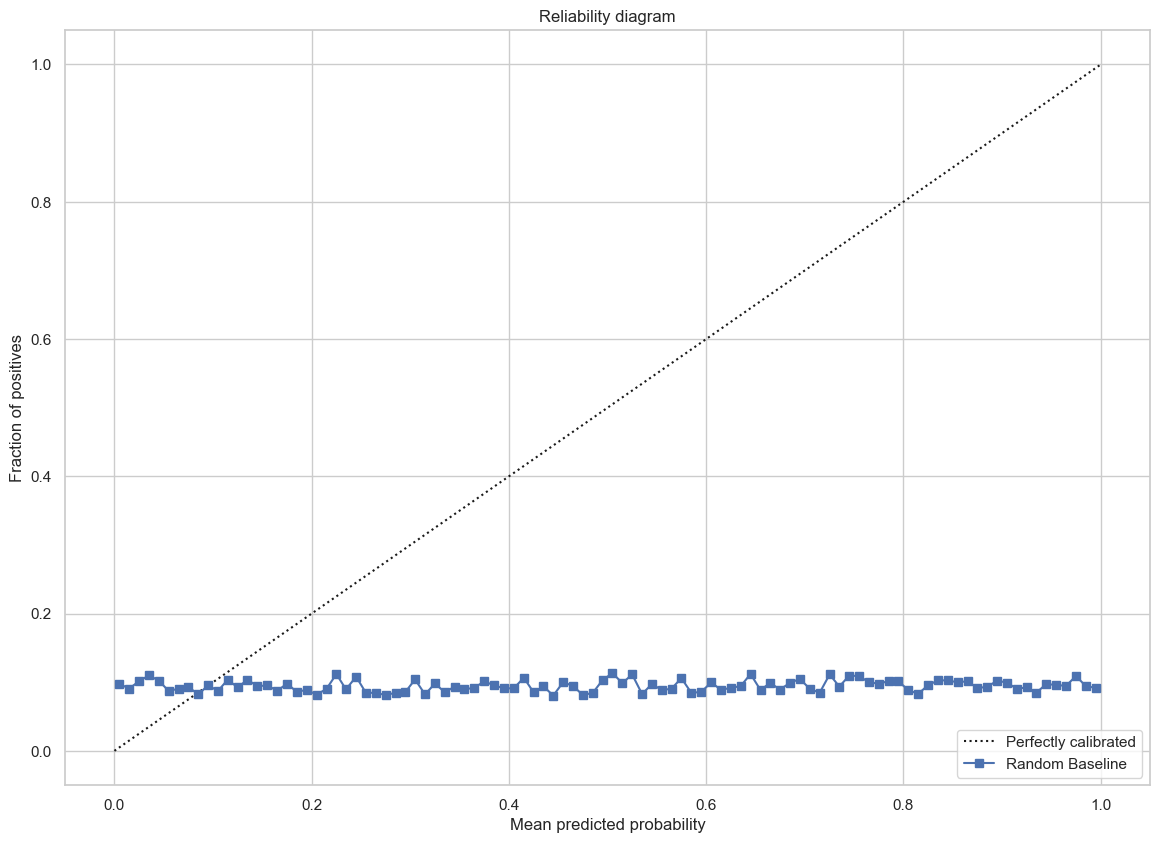

In [105]:
# prob_true_random, prob_pred_random = calibration_curve(one, y_test_ad, n_bins=100)
# # clf_angle_distance, X_test_ad, y_test_ad, name='Logistic Regression', n_bins = 100)
# # print(y_test_ad)
# # y_test = clf.predict_proba(X_test_d)[:,1]
# # print(y_test)
# print(prob_true_random, prob_pred_random)
# disp = CalibrationDisplay(prob_true_random, prob_pred_random, one)
# plt.title("Reliability diagram")
# plt.savefig('./figures/34_Random.png')
# plt.show()

disp = CalibrationDisplay.from_predictions(y_test_ad, one, name='Random Baseline', n_bins = 100)
plt.title("Reliability diagram")
plt.savefig('./figures/34_Random.png')
plt.show()

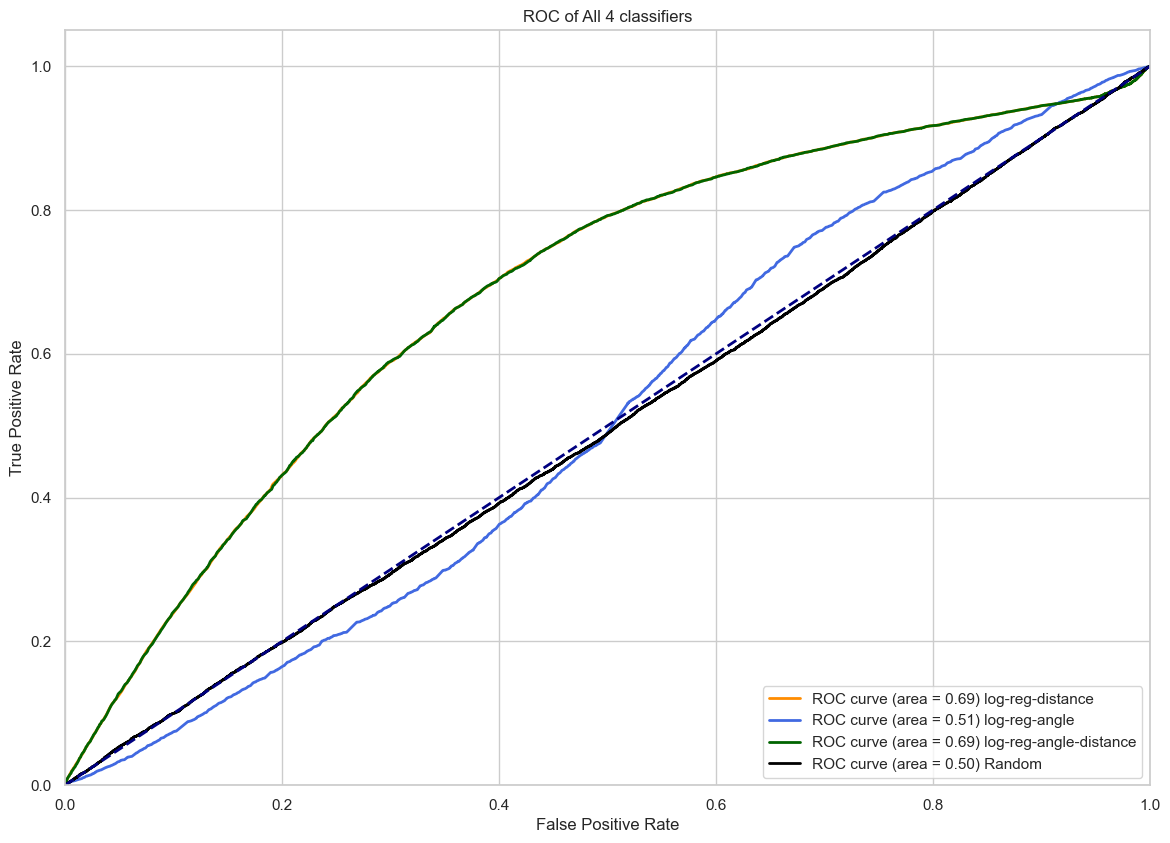

In [114]:
plot([fpr_d,fpr_a, fpr_ad, fpr_r], 
     [tpr_d,tpr_a,tpr_ad, tpr_r], 
     [roc_auc_d, roc_auc_a, roc_auc_ad, roc_auc_r])

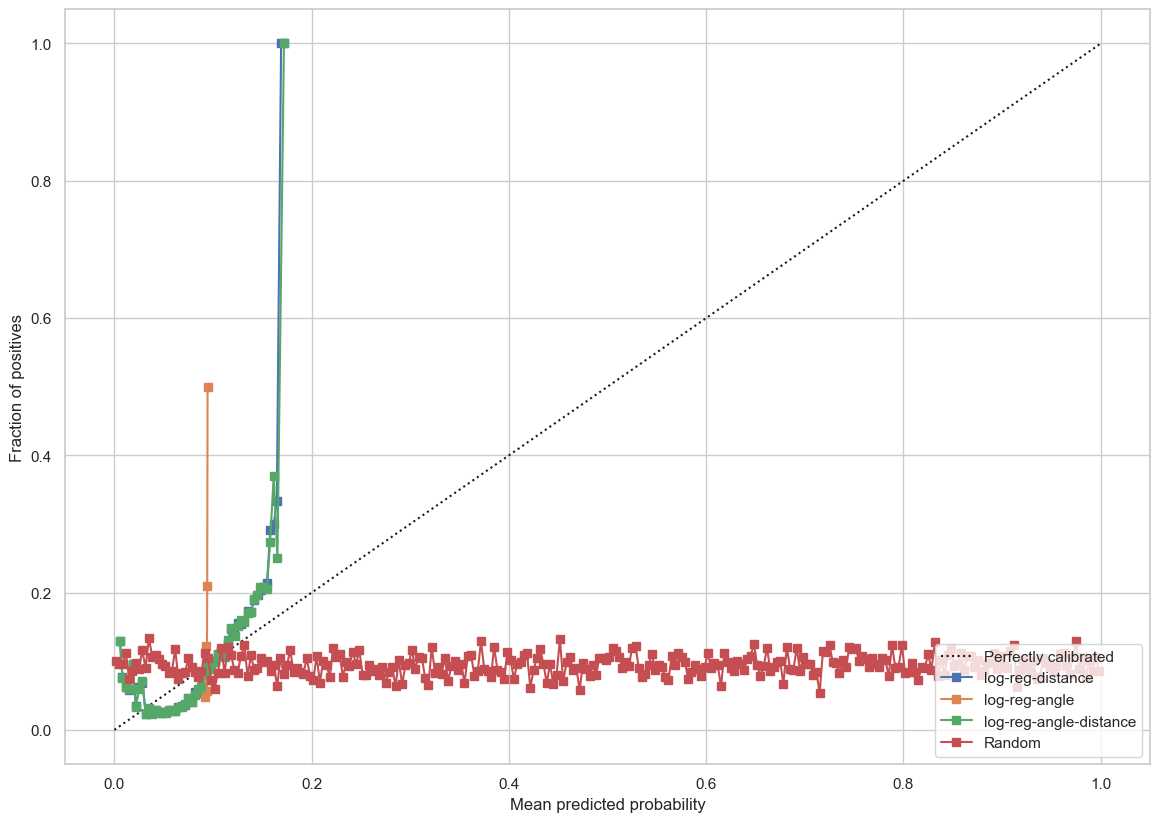

In [136]:
calibration([y_test_d,y_test_a,y_test_ad,y_test_ad],
            [clf.predict_proba(X_test_d)[:,1], 
             clf_angle.predict_proba(X_test_a)[:,1], 
             clf_angle_distance.predict_proba(X_test_ad)[:,1], one])

[(1, 20), (2, 10), (3, 90)]

## 4. Feature Engineering - II (20% + bonus 5%) 

In [98]:
# Done Location Present in the ift 6758 => data => tidyData_adv.py

## 5. Advanced Models (20%)

### Now that we have many features to work with, let's see if this puts us ahead of our simple logistic regression models in part 3. We will be focusing on XGBoost models for this section; you will have free reign to try whatever you would like in the next section.

#### Train an XGBoost classifier using the same dataset using only the distance and angle features (similar to part 3). Don’t worry about hyperparameter tuning yet, this will just serve as a comparison to the baseline before we add more features. Add the corresponding curves to the four figures in your blog post. Briefly (few sentences) discuss your training/validation setup, and compare the results to the Logistic Regression baseline. Include a link to the relevant comet.ml entry for this experiment, but you do not need to log this model to the model registry.


In [ ]:
experiment = Experiment(
    project_name="milestone-2",
    workspace="binulal",
)

In [138]:
from xgboost import XGBClassifier   

In [150]:
xgb_clf = XGBClassifier()
X_angle_distance_xg = data_angle_distance[["dist_goal","angle_goal"]].astype('float')
y_angle_distance_xg = data_angle_distance["isGoal"].apply( lambda x : 1 if x else 0 )
#print(y_angle_distance_xg.dtypes)
X_train_ad_xg, X_test_ad_xg, y_train_ad_xg, y_test_ad_xg = train_test_split(X_angle_distance_xg, 
                                                                            y_angle_distance_xg, test_size=0.33, 
                                                                            random_state=42)


xgb_clf.fit(X_train_ad_xg, y_train_ad_xg )
y_pred_xg = xgb_clf.predict(X_test_ad_xg)
xgb_clf.score(X_test_ad_xg, y_test_ad_xg)

print("The classification report is as follows:\n", classification_report(y_test_ad_xg,y_pred_xg))


f1_ad_xg = f1_score(y_test_ad_xg, y_pred_xg)
precision_angle_xg = precision_score(y_test_ad_xg, y_pred_xg)
recall_angle_xg = recall_score(y_test_ad_xg, y_pred_xg)

#Saving the model 

#save the classifier
location = os.getcwd() +'/models'
fullpath = os.path.join(location)
with open(fullpath + '/Q51_XGboost_distance_angle.pkl', 'wb') as fid:
    pickle.dump(xgb_clf, fid) 

[16:36:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The classification report is as follows:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     99390
           1       0.49      0.00      0.01     10409

    accuracy                           0.91    109799
   macro avg       0.70      0.50      0.48    109799
weighted avg       0.87      0.91      0.86    109799



In [152]:
print(f1_ad_xg, precision_angle_xg, recall_angle_xg )

0.005920550038197097 0.49206349206349204 0.002978191949274666


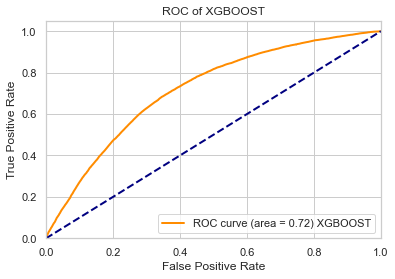

In [203]:
y_score_xgb = xgb_clf.predict_proba(X_test_ad_xg)[:,1]
fpr, tpr, _ = roc_curve(y_test_ad_xg, y_score_xgb)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f) XGBOOST" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of XGBOOST")
plt.legend(loc="lower right")

plt.savefig('./figures/q51_Xgboost_ROC_distance_angle.png')
plt.show()

[0.15809585 0.23996867 0.02339742 ... 0.18815681 0.09323451 0.05204707]


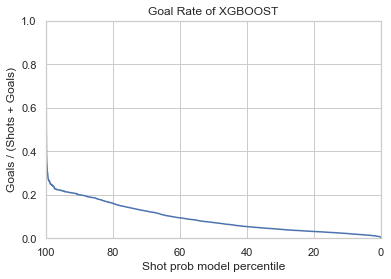

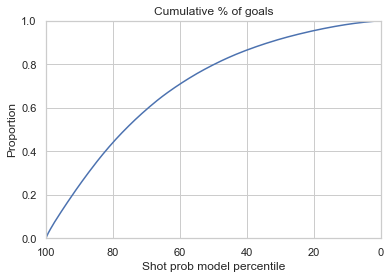

In [156]:
#model percentile
lr_probs = xgb_clf.predict_proba(X_test_ad_xg)[:,1]
n = len(lr_probs)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

print(lr_probs)
lr_probs_y = lr_probs[::-1]
lr_probs_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
lr_probs_y_sum = np.cumsum(lr_probs_y)
#lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

#print(lr_probs_y_sum)
#goal rate

plt.figure()
plt.plot(
    x_axis,
    lr_probs_y,
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of XGBOOST")
plt.savefig('./figures/q51_XGboost_GR.png')
plt.show()

#cumulative plot
plt.figure()
plt.plot(
    x_axis,
    lr_probs_y_sum/sum(lr_probs_y),
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.savefig('./figures/q51_XGboost_CP.png')
plt.show()

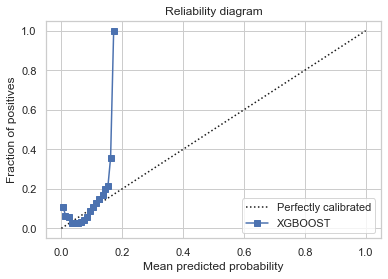

In [158]:
disp = CalibrationDisplay.from_estimator(clf_angle_distance, X_test_ad, y_test_ad, name='XGBOOST', n_bins = 100)
plt.title("Reliability diagram")
plt.savefig('./figures/51_XGboost_RD_angle_distance.png')
plt.show()

#### Now, train an XGBoost classifier using all of the features you created in Part 4 and do some hyperparameter tuning to try to find the best performing model with all of these features. In your blog post, discuss your hyperparameter tuning setup, and include figures to substantiate your choice of hyperparameters. For example, you could select appropriate metrics and do a grid search with cross validation. Once tuned, include curves corresponding to the best model to the four figures in your blog post, and briefly compare the results to the XGBoost baseline. Include a link to the relevant comet.ml entry for this experiment, and log this model to the model registry.
 

In [178]:
data_xgboost = df

print(data_xgboost.shape)
#data_xgboost
#data_xgboost.dtypes

#changing categorical 
data_xgboost["rebound"] = data_xgboost["rebound"].apply( lambda x : 1 if x else 0 )
#print(data_xgboost.isna().sum())
data_xgboost = data_xgboost[["periodSeconds", "period", "coordinates_x", "coordinates_y","dist_goal", "angle_goal", 
                             "shotType", "eventType_last", "coordinates_x_last","coordinates_y_last", "distance_last",
                             "periodSeconds_last","rebound","angle_change","speed", "isGoal"]]


(332742, 29)


In [179]:
data_xgboost_new = data_xgboost.dropna()
print(data_xgboost_new.isna().shape)

(327531, 16)


In [180]:
X_xg = data_xgboost_new.iloc[:, :-1]
y_xg = data_xgboost_new.iloc[:, -1].apply( lambda x : 1 if x else 0 )
X_train, X_test, y_train, y_test = train_test_split(X_xg, y_xg, test_size=0.33, random_state=42)

df = pd.get_dummies(X_xg[["shotType", "eventType_last"]])
#df 

#Concat new and the previous dataframe
X = pd.concat([X_xg,df], axis = 1)

#dropping the two columns 
X_new = X.drop(['shotType', 'eventType_last'], axis = 1)
print(X_new.shape)


(327531, 29)


## Hyper Parameter tuning

In [195]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
#This functions gives us the total time taken by the classifier.

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_new.astype('float'), y_xg, test_size=0.33, random_state=42)
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 7],
        'alpha': [1, 5, 10]
        }


xgb_ht = XGBClassifier(learning_rate=0.1, n_estimators=1000, objective='binary:logistic',
                    silent=True, nthread=1, use_label_encoder=False)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb_ht, param_distributions=params, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=4, cv=skf.split(X_train_1, y_train_1), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train_1, y_train_1)

timer(start_time) # timing ends here for "start_time" variable

print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)

 


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[17:51:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:51:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 14 minutes and 2.39 seconds.

 All results:
{'mean_fit_time': array([138.79959432, 117.80037538, 168.37847074, 311.00534511,
       124.20373305]), 'std_fit_time': array([0.170491

[CV 2/3] END alpha=5, colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8;, score=nan total time=   0.0s
[CV 1/3] END alpha=10, colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8;, score=nan total time=   0.1s
[CV 3/3] END alpha=1, colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.8;, score=nan total time=   0.1s
[CV 3/3] END alpha=10, colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0;, score=nan total time=   0.0s
[17:40:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:40:27] WARNING: /Users/runner/miniforge3/con

In [200]:
XGB_2 = XGBClassifier(alpha=5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=np.nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=1, nthread=1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=5, reg_lambda=1,
              scale_pos_weight=1, silent=True, subsample=0.8,
              tree_method='exact', use_label_encoder=False)
XGB_2.fit(X_train_1, y_train_1 )
y_pred_xg_2 = XGB_2.predict(X_test_1)
XGB_2.score(X_test_1, y_test_1)

print("The classification report is as follows:\n", classification_report(y_test_1,y_pred_xg_2))

[17:58:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:58:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The classification report is as follows:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     97951
           1       0.60      0.03      0.05     10135

    accuracy                           0.91    108086
 

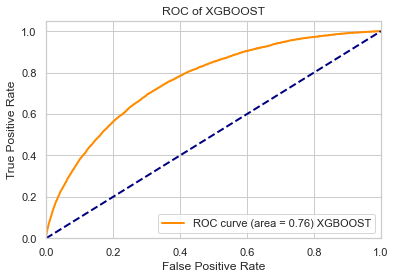

In [202]:
y_score_xgb = XGB_2.predict_proba(X_test_1)[:,1]
fpr, tpr, _ = roc_curve(y_test_1, y_score_xgb)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f) XGBOOST" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of XGBOOST")
plt.legend(loc="lower right")

plt.savefig('./figures/q52_Xgboost_ROC.png')
plt.show()

[0.02279559 0.18529263 0.01912732 ... 0.01894153 0.02978808 0.06176455]


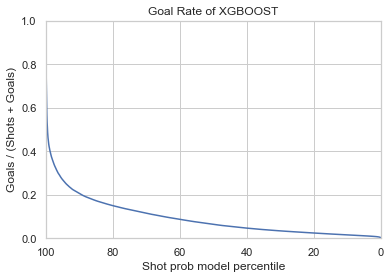

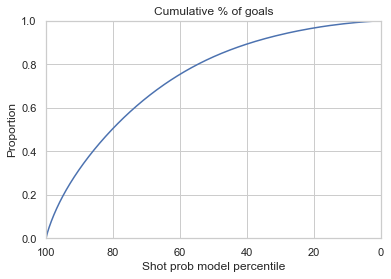

In [204]:
#model percentile
lr_probs = XGB_2.predict_proba(X_test_1)[:,1]
n = len(lr_probs)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

print(lr_probs)
lr_probs_y = lr_probs[::-1]
lr_probs_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
lr_probs_y_sum = np.cumsum(lr_probs_y)
#lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

#print(lr_probs_y_sum)
#goal rate

plt.figure()
plt.plot(
    x_axis,
    lr_probs_y,
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of XGBOOST")
plt.savefig('./figures/q52_XGboost_GR.png')
plt.show()

#cumulative plot
plt.figure()
plt.plot(
    x_axis,
    lr_probs_y_sum/sum(lr_probs_y),
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.savefig('./figures/q52_XGboost_CP.png')
plt.show()

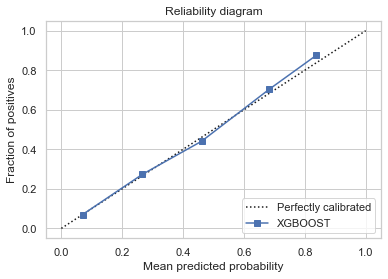

In [207]:
disp = CalibrationDisplay.from_estimator(XGB_2, X_test_1, y_test_1, name='XGBOOST')
plt.title("Reliability diagram")
plt.savefig('./figures/52_XGboost_RD.png')
plt.show()

### Finally, explore using some feature selection techniques to see if you can simplify your input features. A number of features carry correlated information, so you can try to see if some of them are redundant. You can try some of the feature selection techniques discussed in class; many of these are implemented for you by scikit-learn.. You could also use a library like SHAP to try to interpret what feature your model relies on the most. Discuss the feature selection strategies that you tried, and what was the most optimal set of features that you came up with. Include some figures to substantiate your claims. Once you’ve found the optimal set of features via hyperparameter tuning/cross validation, if the feature set is different than what was used for Q2 of this section, include curves corresponding to the best model to the four figures in your blog post, and briefly compare the results to the XGBoost baseline. Include a link to the relevant comet.ml entry for this experiment, and log this model to the model registry.


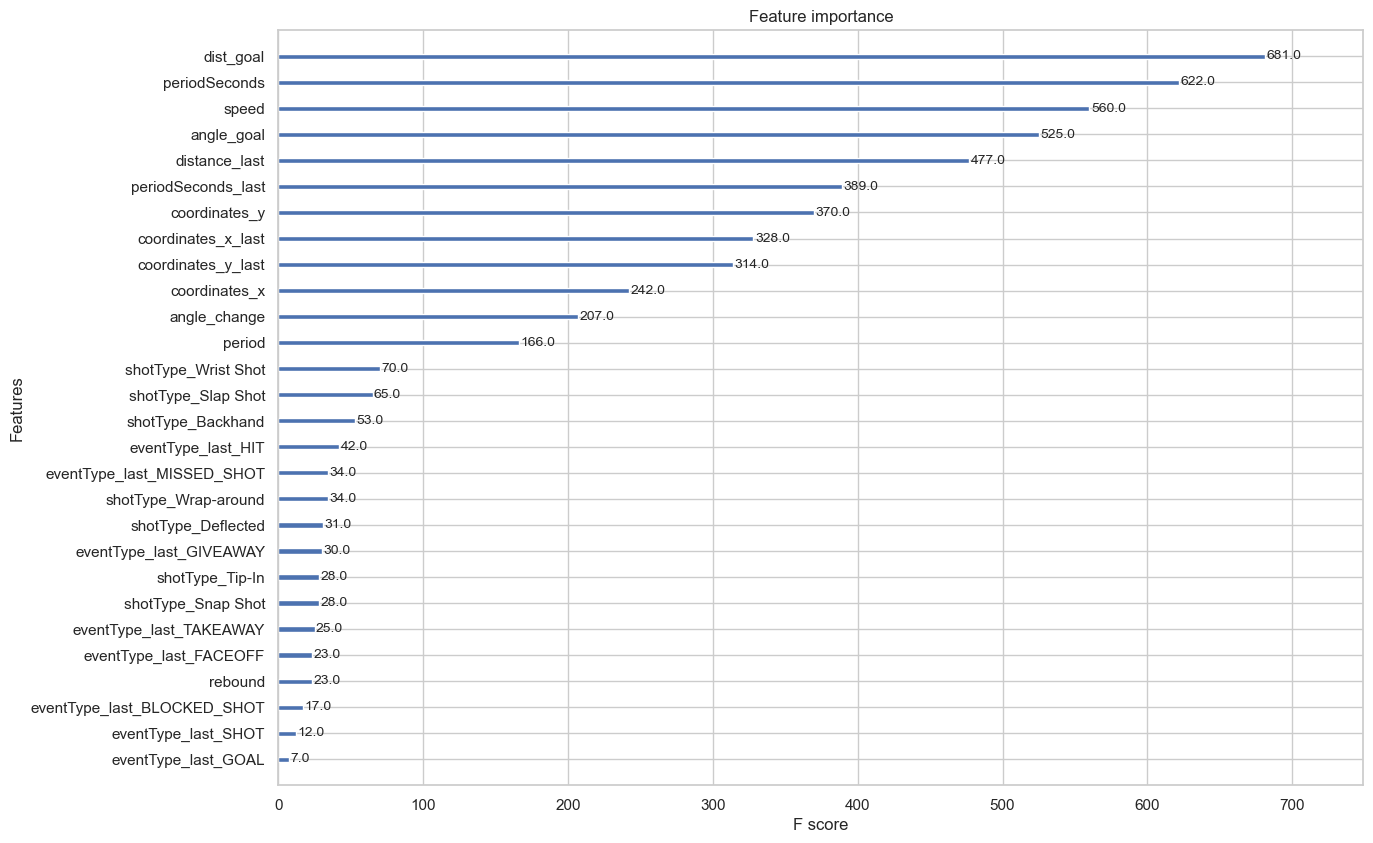

In [214]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['figure.dpi'] = 100 
from xgboost import plot_importance
# plot feature importance
plot_importance(XGB_2)
plt.show()


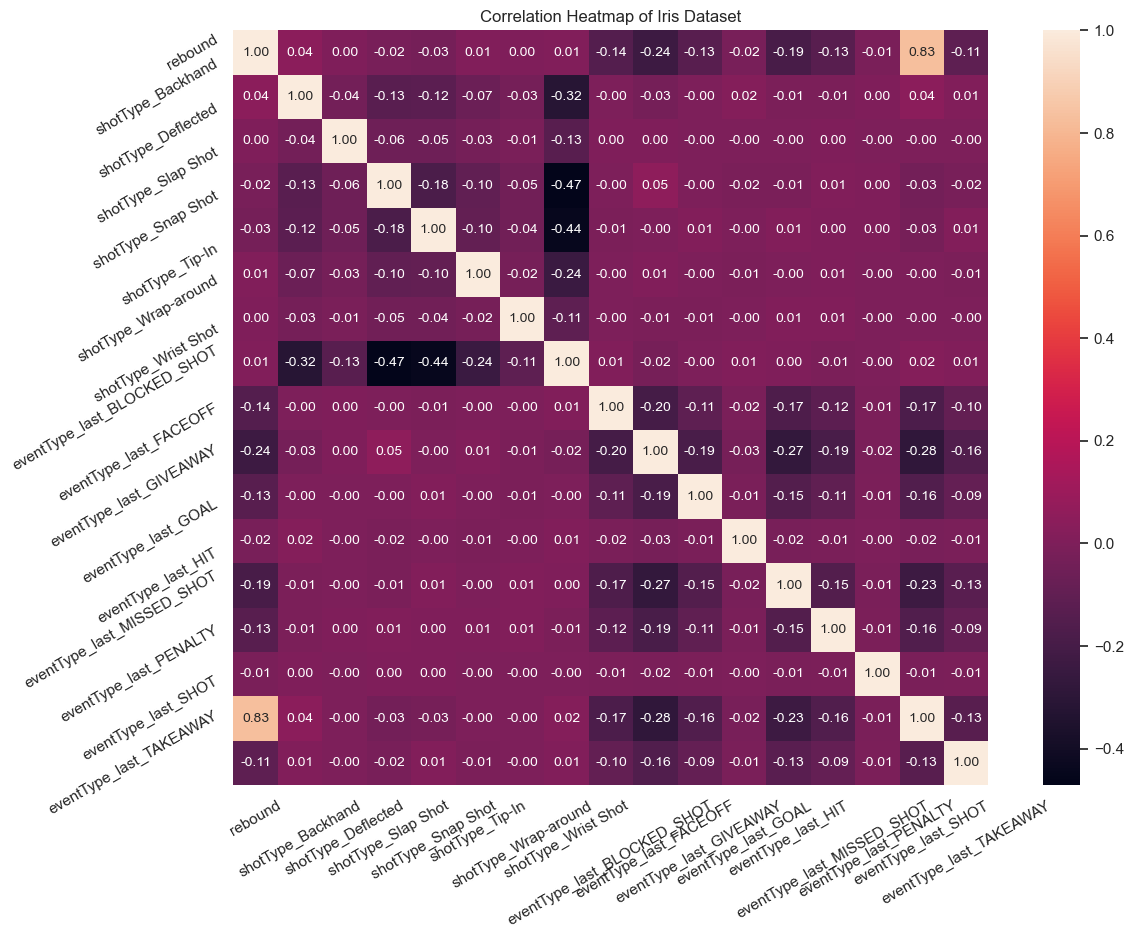

In [217]:
# Create correlation matrix
corr_matrix = X_new.corr()
#print(corr_matrix)

plt.title('Correlation Heatmap of Iris Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()  

In [223]:
!pip3 install featurewiz
# from featurewiz import featurewiz
# output = featurewiz(X_new, y_xg)

  Using cached featurewiz-0.0.51-py3-none-any.whl (73 kB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached dask-2021.11.2-py3-none-any.whl (1.0 MB)
  Using cached category_encoders-2.3.0-py2.py3-none-any.whl (82 kB)
  Using cached distributed-2021.11.2-py3-none-any.whl (802 kB)
  Using cached imbalanced_learn-0.8.1-py3-none-any.whl (189 kB)
  Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Using cached pandas-1.3.4-cp39-cp39-macosx_11_0_arm64.whl
  Using cached dask_ml-2021.11.16-py3-none-any.whl (147 kB)
  Using cached dask_xgboost-0.2.0-py2.py3-none-any.whl (14 kB)
  Using cached xgboost-0.90-cp39-cp39-macosx_12_0_arm64.whl
  Using cached partd-1.2.0-py3-none-any.whl (19 kB)
  Using cached toolz-0.11.2-py3-none-any.whl (55 kB)
  Using cached cloudpickle-2.0.0-py3-none-any.whl (25 kB)
  Using cached fsspec-2021.11.1-py3-none-any.whl (132 kB)
  Using cached PyYAML-6.0-cp39-cp39-macosx_11_0_arm64.whl

  Using cached jupyter_console-6.4.0-py3-none-any.whl (22 kB)
  Using cached qtconsole-5.2.1-py3-none-any.whl (120 kB)
  Using cached QtPy-1.11.2-py2.py3-none-any.whl (58 kB)
  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/ift6758-conda-env/bin/python3.9 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/0t/3x9pw8y15wv301cvvgjgx9s00000gn/T/pip-install-5aoo_5c3/numba_fb7c8386d05a41b5a204e8af1c3da124/setup.py'"'"'; __file__='"'"'/private/var/folders/0t/3x9pw8y15wv301cvvgjgx9s00000gn/T/pip-install-5aoo_5c3/numba_fb7c8386d05a41b5a204e8af1c3da124/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/0t/3x9pw8y15wv301cvvgjgx9s00000gn/T/pip-wheel-_t0

  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/ift6758-conda-env/bin/python3.9 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/0t/3x9pw8y15wv301cvvgjgx9s00000gn/T/pip-install-5aoo_5c3/llvmlite_b555250cea434d66a224338802298349/setup.py'"'"'; __file__='"'"'/private/var/folders/0t/3x9pw8y15wv301cvvgjgx9s00000gn/T/pip-install-5aoo_5c3/llvmlite_b555250cea434d66a224338802298349/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/0t/3x9pw8y15wv301cvvgjgx9s00000gn/T/pip-wheel-c1_nitva
       cwd: /private/var/folders/0t/3x9pw8y15wv301cvvgjgx9s00000gn/T/pip-install-5aoo_5c3/llvmlite_b555250cea434d66a224338802298349/
  Complete output (11 lines):


In [227]:
!conda install --yes -c conda-forge shap 
# !conda install --yes xgboost

Solving environment: done

# All requested packages already installed.



In [248]:
# ! conda-tree whoneeds -t numpy


zsh:1: command not found: conda-tree


In [3]:
# !conda install --upgrade numpy==1.19.1
!conda install --yes -c conda-forge numpy=1.21.4


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/homebrew/Caskroom/miniforge/base/envs/ift6758-conda-env

  added / updated specs:
    - numpy=1.21.4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libllvm10-10.0.1           |       h4468dd5_2        19.3 MB  conda-forge
    llvmlite-0.36.0            |   py39h2f15362_0         234 KB  conda-forge
    numba-0.53.1               |   py39hbdc0675_1         3.6 MB  conda-forge
    numpy-1.21.4               |   py39h1f3b974_0         5.3 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        28.5 MB

The following NEW packages will be INSTAL

In [3]:
import shap


In [187]:
# print(X_new.shape)
# print(y_xg.shape)

xgb_clf_new = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_new, y_xg, test_size=0.33, random_state=42)
X_train = X_train.astype('float')
xgb_clf_new.fit(a, y_train)

y_pred_new = xgb_clf_new.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_new))


(327531, 29)
(327531,)


In [ ]:
X_xg

In [ ]:
X_xg.isna().sum()

In [ ]:
df = pd.get_dummies(X_xg[["shotType", "eventType_last"]])
df

In [ ]:
X_xg_new = pd.concat([X_xg,df], axis = 1)

In [ ]:
X_xg_new

In [ ]:
X_xg_new_1 = X_xg_new.drop(['shotType', 'eventType_last'], axis = 1)

In [ ]:
X_xg = X_xg_new_1.astype('float')
y_xg = y_xg.astype('int')

In [ ]:
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X_xg, y_xg, test_size=0.33, random_state=42)

In [ ]:
xgb_xg_new = XGBClassifier()

In [ ]:
xgb_xg_new.fit(X_train_xg,y_train_xg)

In [ ]:
y_pred_xg_1 = xgb_xg_new.predict(X_test_xg)

In [ ]:
xgb_xg_new.score(X_test_xg, y_test_xg)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test_xg, y_pred_xg_1))

In [ ]:
experiment.end()

## 6. Give it your best shot! (25%)
ruff draft
final model selection and evaluation are from q6_..py files

In [8]:
#import model tracking
import comet_ml
comet_ml.init()

from comet_ml import Experiment
experiment = Experiment(
    project_name="milestone-2",
    workspace="binulal",
)

#imports
from ift6758.data.functions import loadstats
from ift6758.data.functions import pre_process
from ift6758.data.tidyData_adv import tidyData_adv

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
import pandas as pd
import json
import numpy as np
import pickle


# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)

COMET INFO: Comet API key is valid


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### load tidydata

In [6]:

#preload and download from web if not acquired (set to false to download all data)
downloaded = True
if not downloaded:
    datayear = 2016
    while datayear <= 2020:
        loadstats(datayear,'./data/', playoffs=False)
        datayear += 1
    
#outputs games that aren't played up to 7 in playoffs or max games in regular season

dfs_2015 = loadstats(2015,'./data/', playoffs=False)
df_2015 = tidyData_adv(dfs_2015)

dfs_2016 = loadstats(2016,'./data/', playoffs=False)
df_2016 = tidyData_adv(dfs_2016)

dfs_2017 = loadstats(2017,'./data/', playoffs=False)
df_2017 = tidyData_adv(dfs_2017)

dfs_2018 = loadstats(2018,'./data/', playoffs=False)
df_2018 = tidyData_adv(dfs_2018)

dfs_2019_po = loadstats(2019,'./data/', playoffs=True,regular=False)
df_test_po = tidyData_adv(dfs_2019_po)
dfs_2019_rg = loadstats(2019,'./data/', playoffs=False,regular=True)
df_test_rg = tidyData_adv(dfs_2019_rg)

df_train = df_2015.append(df_2016, ignore_index=True).append(df_2017, ignore_index=True).append(df_2018, ignore_index=True)

#save pre_process train/test
pickle.dump(df_train,open("./data/data_train_tidy.pickle","wb"))
pickle.dump(df_test_po,open("./data/data_test_po_tidy.pickle","wb"))
pickle.dump(df_test_rg,open("./data/data_test_rg_tidy.pickle","wb"))

#load tidydata
# df_train = pickle.load( open("./data/data_train_tidy.pickle",'rb'))
# df_test_po = pickle.load( open("./data/data_test_po_tidy.pickle","rb"))
# df_test_rg = pickle.load( open("./data/data_test_rg_tidy.pickle","rb"))



Error code: 404 at gameID:2015021231. Game not found.
size of data in regular season: 1230
Error code: 404 at gameID:2016021231. Game not found.
size of data in regular season: 1230
size of data in regular season: 1271
size of data in regular season: 1271
Error code: 404 at gameID:2019030007. Game not found.
Error code: 404 at gameID:2019030017. Game not found.
Error code: 404 at gameID:2019030026. Game not found.
Error code: 404 at gameID:2019030036. Game not found.
Error code: 404 at gameID:2019030046. Game not found.
Error code: 404 at gameID:2019030056. Game not found.
Error code: 404 at gameID:2019030066. Game not found.
Error code: 404 at gameID:2019030076. Game not found.
Error code: 404 at gameID:2019030086. Game not found.
Error code: 404 at gameID:2019030096. Game not found.
size of data in regular season & playoffs: 157
Error code: 404 at gameID:2019030007. Game not found.
Error code: 404 at gameID:2019030017. Game not found.
Error code: 404 at gameID:2019030026. Game not fo

NameError: name 'pickle' is not defined

In [23]:
df_train.isnull().sum()

game_id                    0
event_idx                  0
speed                   4973
periodSeconds_last         0
eventType_last             0
rebound                    0
period                     0
periodType                 0
periodTime                 0
periodSeconds              0
teamInfo                   0
isGoal                     0
shotType                  38
coordinates_x             18
coordinates_y             18
coordinates_x_last      4958
coordinates_y_last      4957
distance_last           4973
dist_goal                 20
angle_goal                20
angle_change               0
angle_speed           267078
shooter                    0
goalie                     9
emptyNet                   0
strength              281919
homeTeam                   0
awayTeam                   0
homeSide                5226
dtype: int64

### preprocess

In [24]:
#preprocess with 100+ features
df_train['train']=1
df_test_po['train']=0
df_test_rg['train']=2

df_all = df_train.append(df_test_po, ignore_index=True).append(df_test_rg, ignore_index=True)
df_nonull = pre_process(df_all)
df_train = df_nonull[df_nonull.train == 1].drop(['train'], axis=1)
df_test_po = df_nonull[df_nonull.train == 0].drop(['train'], axis=1)
df_test_rg = df_nonull[df_nonull.train == 2].drop(['train'], axis=1)
#df_test.reset_index(drop=True, inplace=True)?

#save pre_process train/test
pickle.dump(df_train,open("./data/data_train_prep.pickle","wb"))
pickle.dump(df_test_po,open("./data/data_test_po_prep.pickle","wb"))
pickle.dump(df_test_rg,open("./data/data_test_rg_prep.pickle","wb"))

In [ ]:
# #preprocess with 1000+ features
# df_train['train']=1
# df_test['train']=0
# df_all = df_train.append(df_test, ignore_index=True)
# df_nonull = pre_process(df_all,hd=True)
# df_train = df_nonull[df_nonull.train == 1]
# df_test = df_nonull[df_nonull.train == 0]

# #save pre_process train/test
# pickle.dump(df_train,open("./data/data_train_prepHD.pickle","wb"))
# pickle.dump(df_test,open("./data/data_test_prepHD.pickle","wb"))

### load data

In [26]:
#load preprocessed data 100 features
df_train = pickle.load( open("./data/data_train_prep.pickle",'rb'))
df_test_po = pickle.load( open("./data/data_test_po_prep.pickle","rb"))
df_test_rg = pickle.load( open("./data/data_test_rg_prep.pickle","rb"))

In [27]:
df_train.head()
# #preprocess test and train (assume constant one hot variable space)
# df_nonull = pre_process(df_all)
# #sanitycheck
# print(df_all.shape)
# print(df_nonull.shape)
# print(23-6+9+31+7+1320+145+30)
# df_nonull.head()


,speed,periodSeconds_last,rebound,period,periodSeconds,isGoal,coordinates_x,coordinates_y,coordinates_x_last,coordinates_y_last,distance_last,dist_goal,angle_goal,angle_change,emptyNet,homeSide,periodType_OVERTIME,periodType_REGULAR,periodType_SHOOTOUT,eventType_last_BLOCKED_SHOT,eventType_last_FACEOFF,eventType_last_GIVEAWAY,eventType_last_GOAL,eventType_last_HIT,eventType_last_MISSED_SHOT,eventType_last_PENALTY,eventType_last_SHOT,eventType_last_TAKEAWAY,teamInfo_Anaheim Ducks,teamInfo_Arizona Coyotes,teamInfo_Boston Bruins,teamInfo_Buffalo Sabres,teamInfo_Calgary Flames,teamInfo_Carolina Hurricanes,teamInfo_Chicago Blackhawks,teamInfo_Colorado Avalanche,teamInfo_Columbus Blue Jackets,teamInfo_Dallas Stars,teamInfo_Detroit Red Wings,teamInfo_Edmonton Oilers,teamInfo_Florida Panthers,teamInfo_Los Angeles Kings,teamInfo_Minnesota Wild,teamInfo_Montréal Canadiens,teamInfo_Nashville Predators,teamInfo_New Jersey Devils,teamInfo_New York Islanders,teamInfo_New York Rangers,teamInfo_Ottawa Senators,teamInfo_Philadelphia Flyers,teamInfo_Pittsburgh Penguins,teamInfo_San Jose Sharks,teamInfo_St. Louis Blues,teamInfo_Tampa Bay Lightning,teamInfo_Toronto Maple Leafs,teamInfo_Vancouver Canucks,teamInfo_Vegas Golden Knights,teamInfo_Washington Capitals,teamInfo_Winnipeg Jets,shotType_Backhand,shotType_Deflected,shotType_Slap Shot,shotType_Snap Shot,shotType_Tip-In,shotType_Wrap-around,shotType_Wrist Shot,homeTeam_Anaheim Ducks,homeTeam_Arizona Coyotes,homeTeam_Boston Bruins,homeTeam_Buffalo Sabres,homeTeam_Calgary Flames,homeTeam_Carolina Hurricanes,homeTeam_Chicago Blackhawks,homeTeam_Colorado Avalanche,homeTeam_Columbus Blue Jackets,homeTeam_Dallas Stars,homeTeam_Detroit Red Wings,homeTeam_Edmonton Oilers,homeTeam_Florida Panthers,homeTeam_Los Angeles Kings,homeTeam_Minnesota Wild,homeTeam_Montréal Canadiens,homeTeam_Nashville Predators,homeTeam_New Jersey Devils,homeTeam_New York Islanders,homeTeam_New York Rangers,homeTeam_Ottawa Senators,homeTeam_Philadelphia Flyers,homeTeam_Pittsburgh Penguins,homeTeam_San Jose Sharks,homeTeam_St. Louis Blues,homeTeam_Tampa Bay Lightning,homeTeam_Toronto Maple Leafs,homeTeam_Vancouver Canucks,homeTeam_Washington Capitals,homeTeam_Winnipeg Jets,awayTeam_Anaheim Ducks,awayTeam_Arizona Coyotes,awayTeam_Boston Bruins,awayTeam_Buffalo Sabres,awayTeam_Calgary Flames,awayTeam_Carolina Hurricanes,awayTeam_Chicago Blackhawks,awayTeam_Colorado Avalanche,awayTeam_Columbus Blue Jackets,awayTeam_Dallas Stars,awayTeam_Detroit Red Wings,awayTeam_Edmonton Oilers,awayTeam_Florida Panthers,awayTeam_Los Angeles Kings,awayTeam_Minnesota Wild,awayTeam_Montréal Canadiens,awayTeam_Nashville Predators,awayTeam_New Jersey Devils,awayTeam_New York Islanders,awayTeam_New York Rangers,awayTeam_Ottawa Senators,awayTeam_Philadelphia Flyers,awayTeam_Pittsburgh Penguins,awayTeam_San Jose Sharks,awayTeam_St. Louis Blues,awayTeam_Tampa Bay Lightning,awayTeam_Toronto Maple Leafs,awayTeam_Vancouver Canucks,awayTeam_Vegas Golden Knights,awayTeam_Washington Capitals,awayTeam_Winnipeg Jets
0,14.025066,11.0,0.0,1,51.0,0.0,-55.0,6.0,94.0,-34.0,154.275727,35.510562,-9.727579,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7.211103,7.0,0.0,1,65.0,0.0,-79.0,0.0,-37.0,-28.0,50.477718,11.0,-0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.123106,1.0,1.0,1,66.0,0.0,-75.0,-1.0,-79.0,0.0,4.123106,15.033296,3.814075,3.814075,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.422515,18.0,0.0,1,1

### Model Search

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

#save with joblib faster with np
from joblib import dump, load


In [ ]:
# Splitting the dataset into the Training set and Test set for grid search CV 5
#preprocess
df_prep = df_train
y = df_prep['isGoal']
X = df_prep.drop(['isGoal'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(257178, 1726)
(257178,)
(64295, 1726)
(64295,)


In [ ]:
print(len(y_test.to_numpy()))

64295


In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# minmax = MinMaxScaler()

# df_minmax = minmax.fit_transform(df_nonull[['isGoal']])

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# df_sc = sc.fit_transform(df_nonull[['rebound']])

### feature selection tests

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False)
model_s = SelectFromModel(lsvc)

clf = Pipeline([('var', VarianceThreshold()),('scaler', StandardScaler()),
  ('feature_selection', model_s)
])

X_new = clf.fit_transform(X,y)
X_new.shape

X_train_s = clf.transform(X_train)
print(X_train_s.shape)
X_train_s = clf.transform(X_test)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel

skb = SelectKBest(f_classif, k = 10)
clf = Pipeline([('var', VarianceThreshold()),('scaler', StandardScaler()),('skb', skb)])

X_new = clf.fit_transform(X,y)
X_new.shape

X_train_10 = clf.transform(X_train)
print(X_train_10.shape)
X_test_10 = clf.transform(X_test)

(321473, 10)

COMET ERROR: Failed to extract parameters from estimator


Fitting 5 folds for each of 4 candidates, totalling 20 fits


COMET ERROR: Failed to extract parameters from estimator


Best parameter (CV score=0.911):
{'C': 0.0001}


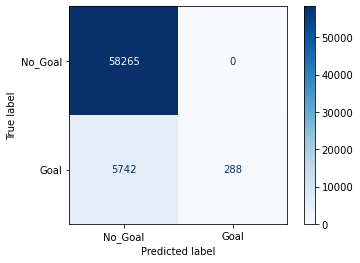

In [ ]:
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "C": np.logspace(-4, 4, 4),
}
search_logR = GridSearchCV(logistic, param_grid, n_jobs=-1, verbose=2)
search_logR.fit(X_train_10, y_train)
#save
#dump(search_logR, './models/Q6logR_s.joblib')

#load
#search_logR = load('./models/Q6logR_s.joblib')

print("Best parameter (CV score=%0.3f):" % search_logR.best_score_)
print(search_logR.best_params_)

ConfusionMatrixDisplay.from_estimator(search_logR, X_test_10, y_test,
                                display_labels=['No_Goal','Goal'],
                                cmap=plt.cm.Blues)
plt.show()


### logistic regression

In [ ]:
pca = PCA()
X_train = StandardScaler().fit_transform(X_train)
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_
print(len(explained_variance))
print(sum(explained_variance[0:85]))

COMET ERROR: Failed to extract parameters from estimator


Fitting 5 folds for each of 16 candidates, totalling 80 fits


COMET ERROR: Failed to extract parameters from estimator


Best parameter (CV score=0.911):
{'logistic__C': 0.0001, 'pca__n_components': 90}


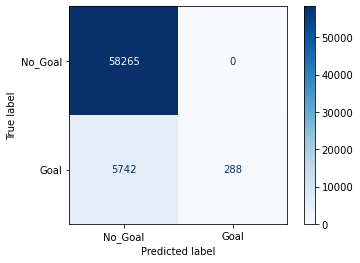

In [ ]:
pca = PCA()
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)

pipe = Pipeline(steps=[('scaler', StandardScaler()), ("pca", pca), ("logistic", logistic)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": [85, 90, 100,120],
    "logistic__C": np.logspace(-4, 4, 4),
}

search_logR = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose=10)
search_logR.fit(X_train, y_train)
#save
dump(search_logR, './models/Q6logR_s.joblib')

#load
#search_logR = load('./models/Q6logR_s.joblib')

print("Best parameter (CV score=%0.3f):" % search_logR.best_score_)
print(search_logR.best_params_)

# print(search.score(X_test, y_test))
# y_pred = search.predict(X_test)
# explained_variance = pca.explained_variance_ratio_
# print(len(explained_variance))
# print(sum(explained_variance[0:85]))

ConfusionMatrixDisplay.from_estimator(search_logR, X_test, y_test,
                                display_labels=['No_Goal','Goal'],
                                cmap=plt.cm.Blues)
plt.show()


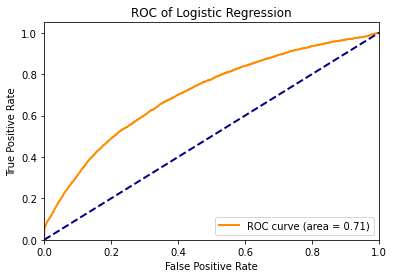

In [ ]:
#plot roc
from sklearn.metrics import roc_curve, auc

y_score = search_logR.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Logistic Regression")
plt.legend(loc="lower right")

plt.savefig('./figures/q61_logR_ROC.png')
plt.show()

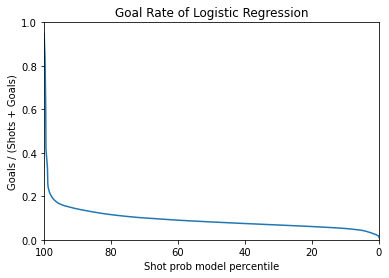

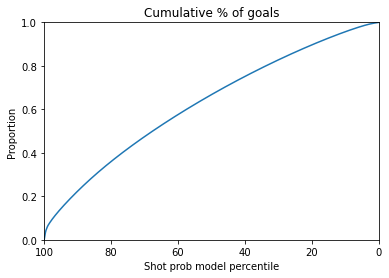

In [ ]:
#model percentile
lr_probs = search_logR.predict_proba(X_test)
n = len(lr_probs)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

# print(lr_probs)
lr_probs_y = lr_probs[:, 1]
lr_probs_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
lr_probs_y_sum = np.cumsum(lr_probs_y)
#lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

#print(lr_probs_y_sum)
#goal rate

plt.figure()
plt.plot(
    x_axis,
    lr_probs_y,
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of Logistic Regression")
plt.savefig('./figures/q61_logR_GR.png')
plt.show()

#cumulative plot
plt.figure()
plt.plot(
    x_axis,
    lr_probs_y_sum/sum(lr_probs_y),
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.savefig('./figures/q61_logR_CP.png')
plt.show()

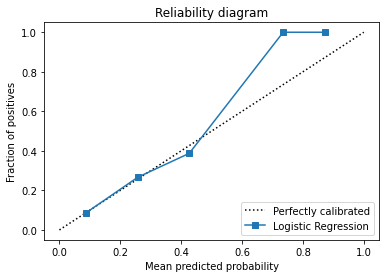

In [ ]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_estimator(search_logR, X_test, y_test, name='Logistic Regression')
plt.title("Reliability diagram")
plt.savefig('./figures/q61_logR_RD.png')
plt.show()

In [ ]:
y_pred = search_logR.predict(X_test)
print("\nResults\nConfusion matrix \n {}".format(confusion_matrix(y_test, y_pred)))

#quantitative metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 score is {:6.3f}".format(f1))
print("Precision score is {:6.3f}".format(precision))
print("Recall score is {:6.3f}".format(recall))


Results
Confusion matrix 
 [[58263     2]
 [ 5742   288]]
F1 score is  0.091
Precision score is  0.993
Recall score is  0.048


### svc

0.8977214402364103


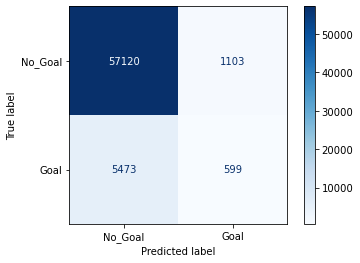

In [ ]:
from sklearn.svm import SVC

search_svc = Pipeline(steps=[('scaler', StandardScaler()), ("pca", PCA(n_components = 85)), ("svc", SVC(kernel='rbf',C=10))])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
# param_grid = {'svc__kernel':('linear','rbf'), 
#                'svc__C':[1, 10]}


# search_svc = GridSearchCV(pipe, param_grid, n_jobs=-1,verbose=2)

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_train, y_train, stratify=y_train, test_size=0.10, random_state=0)

search_svc.fit(X_test_svm, y_test_svm)
# print("Best parameter (CV score=%0.3f):" % search_svc.best_score_)
# print(search_svc.best_params_)

# print("Grid scores on development set:")
# print()
# means = search_svc.cv_results_['mean_test_score']
# stds = search_svc.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, search_svc.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#           % (mean, std * 2, params))
print(search_svc.score(X_test, y_test))
ConfusionMatrixDisplay.from_estimator(search_svc, X_test, y_test,
                                display_labels=['No_Goal','Goal'],
                                cmap=plt.cm.Blues)
plt.show()

### random forest

0.9103973870440937


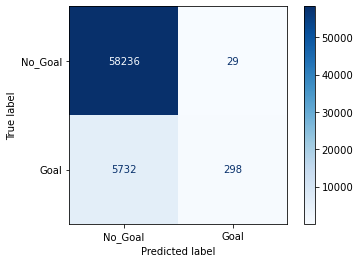

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into the Training set and Test set for grid search CV 5
#preprocess using all features
df_prep = pre_process(df_all,hd=True)
y = df_prep['isGoal']
X = df_prep.drop(['isGoal'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)


rfc = RandomForestClassifier(n_jobs=-1, n_estimators = 200, max_features = 'sqrt', oob_score = True) 

search_rf = Pipeline(steps=[('scaler', StandardScaler()), ("pca", PCA(n_components = 85)), ("rfc",rfc)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
# param_grid = { 
#     'rfc__n_estimators': [200, 500],
#     'rfc__max_features': ['sqrt', 'log2']
# }

# search_rf = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1,verbose=12)
# search_rf.fit(X_train, y_train)
# print("Best parameter (CV score=%0.3f):" % search_rf.best_score_)
# print(search_rf.best_params_)

# print("Grid scores on development set:")
# print()
# means = search_rf.cv_results_['mean_test_score']
# stds = search_rf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, search_rf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#           % (mean, std * 2, params))


#X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_train, y_train, stratify=y_train, test_size=0.10, random_state=0)

search_rf.fit(X_train, y_train)

print(search_rf.score(X_test, y_test))
ConfusionMatrixDisplay.from_estimator(search_rf, X_test, y_test,
                                display_labels=['No_Goal','Goal'],
                                cmap=plt.cm.Blues)
plt.show()

In [ ]:
scores = cross_val_score(search_rf, X_train, y_train, cv=3, scoring='accuracy')
print("Voting: Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

### ada boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

pipe = Pipeline(steps=[('scaler', StandardScaler()), ("pca", PCA(n_components = 85)), ("ada",ada)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = { 
    'ada__n_estimators': [10,50,250,1000],
    'ada__learning_rate': [0.01,0.1,1]
}


search_ada = GridSearchCV(pipe, param_grid, n_jobs=-1,verbose=10)
search_ada.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search_ada.best_score_)
print(search_ada.best_params_)

print("Grid scores on development set:")
print()
means = search_ada.cv_results_['mean_test_score']
stds = search_ada.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, search_ada.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

ConfusionMatrixDisplay.from_estimator(search_ada, X_test, y_test,
                                display_labels=['No_Goal','Goal'],
                                cmap=plt.cm.Blues)
plt.show()

### mlpclassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(batch_size=500, learning_rate='adaptive', max_iter=200, verbose=True,  early_stopping=True)


pipe = Pipeline(steps=[('scaler', StandardScaler()), ("pca", PCA(n_components = 85)), ("mlp",mlp)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
parameter_space = {
    'mlp__hidden_layer_sizes': [(60,30,10),(60,60)],
    'mlp__activation': ['tanh', 'relu'],
}


search_mlp = GridSearchCV(pipe, parameter_space, n_jobs=-1, verbose=10)
search_mlp.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search_mlp.best_score_)
print(search_mlp.best_params_)

print("Grid scores on development set:")
print()
means = search_mlp.cv_results_['mean_test_score']
stds = search_mlp.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, search_mlp.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

ConfusionMatrixDisplay.from_estimator(search_mlp, X_test, y_test,
                                display_labels=['No_Goal','Goal'],
                                cmap=plt.cm.Blues)
plt.show()

### ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
#model pipeline
clf_vote = VotingClassifier(
    estimators=[
        ('rf', search_rf), # KNN
        ('svm', search_svc), # SVM
        ('logistic', search_logR), # Logistic Regression
        ('adaboost', search_ada), # Logistic Regression
        ('mlp', search_mlp) #adaboost
        ],
    weights=[1, 1, 1, 1, 1],
    voting='soft')
clf_vote.fit(X_train, y_train)
clf_vote.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_vote, X_train, y_train, cv=5, scoring='accuracy')
print("Voting: Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

## 7. Evaluate on test set (10%)

### save models to comet

In [ ]:
#import in the beginning
import comet_ml
comet_ml.init()

from comet_ml import Experiment
experiment = Experiment(
    project_name="milestone-2",
    workspace="binulal",
)


#save with joblib faster with np
from joblib import dump, load
#save
dump(clf, './models/Q6logR_s.joblib')
#load
#clf = load('./models/Q6logR_s.joblib')

#include this at the end
experiment.log_model("Q6_Full_logistic_reg", "./model/Q6logR_s.joblib")
#experiment.end()


### load models from comet

In [ ]:
from comet_ml import API
api = API()
# Download a Registry Model: eg "Q6-Full-ens" registered model name
api.download_registry_model("binulal", "Q6-Full-ens", "1.0.0",
                            output_path="./models", expand=True)

## 8. Blog Post (upto 30% penalty)